<a href="https://colab.research.google.com/github/Michaelzats/Pipedrive-Analysis/blob/main/Pipedrive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ALL TIME DATA

# 1) To Create the graphs



In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
import seaborn as sn


import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("pipedrive1.csv")
pd.set_option('display.max_columns', None)
df.head(50)


Name Sync to CZ  \
0                             Cité VIOTTE in Besançon        NaN   
1                                          Merck KGaA        Yes   
2                                    UniCredit S.p.A.        NaN   
3                                            ENBW ODR        NaN   
4                                        Hansgrohe SE        Yes   
5                                             Novatec        Yes   
6                                                BICG        NaN   
7                       W+P workspace consulting GmbH        Yes   
8   AOK PLUS – Die Gesundheitskasse für Sachsen un...        NaN   
9                               GOLDBECK Südwest GmbH        Yes   
10                                  Robert Bosch GmbH        Yes   
11                  Borussia Dortmund GmbH & Co. KGaA        NaN   
12                             Inolares GmbH & Co. KG        NaN   
13             Bundesamt für Bauwesen und Raumordnung        NaN   
14                                      Hellmich GmbH        Yes   
15                                        Lendis GmbH        NaN   
16                         Emscher Lippe Energie GmbH        NaN   
17                                      Beiersdorf AG        NaN   
18  PricewaterhouseCoopers GmbH Wirtschaftsprüfung...        NaN   
19            Streit Service & Solution GmbH & Co. KG        NaN   
20                                         WIIPP GmbH        Yes   
21                                 gkv informatik GbR        NaN   
22                                      Carl Zeiss AG        NaN   
23                                   Roche Holding AG        NaN   
24                                            Telekom        NaN   
25                                           Diconium        NaN   
26                     Herbert Waldmann GmbH & Co. KG        Yes   
27                                       Büro Walther        NaN   
28                             büro...ZIMMERMANN e.K.        NaN   
29                        Büroausstattung Wagner GmbH        NaN   
30                    Waldmann Illuminotecnica S.r.l.        Yes   
31                     KONTEK Objekteinrichtungs GmbH        NaN   
32                              Design Werkstatt GmbH        NaN   
33                                         Büro Beier        NaN   
34               Hutloff GmbH - Lebenswert Einrichten        NaN   
35                            Planobjekt Leipzig GmbH        NaN   
36                                  Büroland Chemnitz        NaN   
37                                        Bridgemaker        Yes   
38  Globalfoundries Management Services Limited Li...        NaN   
39                                  GOLDBECK Ost GmbH        NaN   
40                                               Jabe        NaN   
41                      Leuco Ledermann GmbH & Co. KG        NaN   
42                                        FND-Quadrat        NaN   
43                           büroplan - ergoplan e.K.        NaN   
44                         Palmberg - Showroom Berlin        NaN   
45                HAGEMEYER Deutschland GmbH & Co. KG        NaN   
46                                       Progetto CMR        NaN   
47              Rheinischer Sparkassenund Giroverband        NaN   
48                            Lichtvision Design GmbH        NaN   
49              KIST Büro- und Objekteinrichtung GmbH        Yes   

              Owner  People  Open deals Organization created  \
0   Martin Domschke       0           0  2019-07-03 12:19:06   
1   Katharina Schex       1           0  2019-07-03 12:22:17   
2   Martin Domschke       2           0  2019-07-03 12:31:42   
3   Martin Domschke       1           1  2019-07-03 12:38:44   
4         Tim Klems       0           1  2019-07-03 12:40:09   
5         Tim Klems       1           0  2019-07-03 12:54:52   
6   Martin Domschke       0           0  2019-07-03 12:58:19   
7   Katharina Schex       6           1  2019-07-03 13:02:44   
8   

In [ ]:
print(df.describe())


            People   Open deals           ID    Won deals   Lost deals  \
count  6215.000000  6215.000000  6215.000000  6215.000000  6215.000000   
mean      1.218825     0.042478  3891.841030     0.018182     0.055672   
std       0.915693     0.204073  2101.855921     0.137185     0.234166   
min       0.000000     0.000000     4.000000     0.000000     0.000000   
25%       1.000000     0.000000  2164.500000     0.000000     0.000000   
50%       1.000000     0.000000  3956.000000     0.000000     0.000000   
75%       1.000000     0.000000  5636.500000     0.000000     0.000000   
max      17.000000     2.000000  7552.000000     2.000000     2.000000   

       Closed deals  Total activities  Done activities  Activities to do  \
count   6215.000000       6215.000000      6215.000000       6215.000000   
mean       0.077072          3.776669         3.709413          0.067257   
std        0.287068          6.113770         6.101533          0.308627   
min        0.000000          

In [ ]:
print(df["Amount invoiced users"].median())


100.0


LIZ Partner    375
LIZ online     173
Waldmann       152
LIZ direct     127
Name: Lead Source, dtype: int64


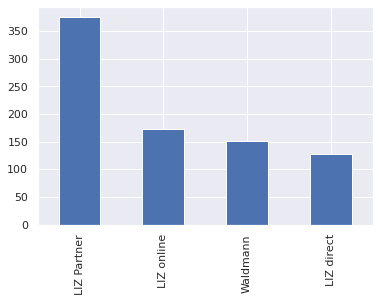

In [ ]:
source = df['Lead Source'].value_counts()
print(source)

# # creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
# courses = list(data.keys())
# values = list(data.values())
  
ax = df['Lead Source'].value_counts().plot(kind='bar')
# ax.set_xscale('log')


In [ ]:
Owner = df['LIZ Sales Mitarbeiter'].value_counts()
print(Owner)


Jaana Moser        71
Eric Schäfer       63
Martin Domschke    60
Jens Kühn          46
Eric Schaefer       3
Erik Schäfer        2
Jens                2
Jaana               2
Jen Kühn            1
Name: LIZ Sales Mitarbeiter, dtype: int64


0    3538
6     557
2     460
3     455
4     335
Name: Email messages count, dtype: int64


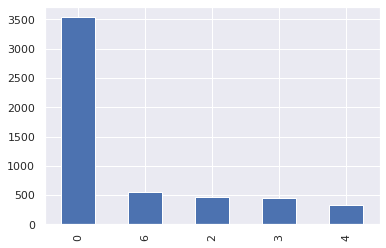

In [ ]:
Email = df['Email messages count'].value_counts()
print(Email.head())
Email.head().plot(kind='bar')

Software only                            133
Hardware-based booking                    49
Smart Data Center                          3
Software only, Hardware-based booking      2
Name: Kunden Typ, dtype: int64


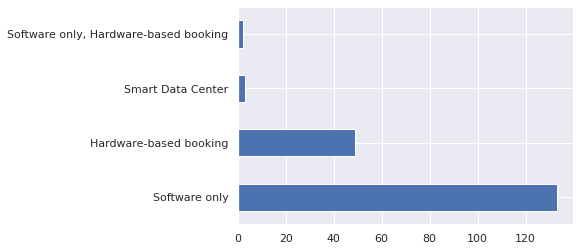

In [ ]:
Kunden_Typ = df['Kunden Typ'].value_counts()
print(Kunden_Typ)
Kunden_Typ.head().plot(kind='barh')


IT Services and IT Consulting           328
consulting                              235
IT and Services                         134
Financial Services                      130
Technology, Information and Internet    118
Software Development                    113
Motor Vehicle Manufacturing             112
Name: Branche, dtype: int64


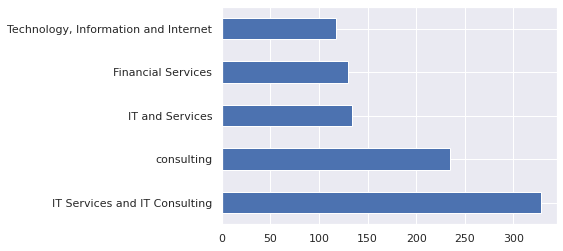

In [ ]:
Branche = df['Branche'].value_counts()
print(Branche.head(7))

Branche.head().plot(kind='barh')

Berlin                 381
Bayern                 214
Nordrhein-Westfalen    213
Baden-Württemberg      205
Hessen                 120
Niedersachsen           64
Hamburg                 63
Name: State/county, dtype: int64


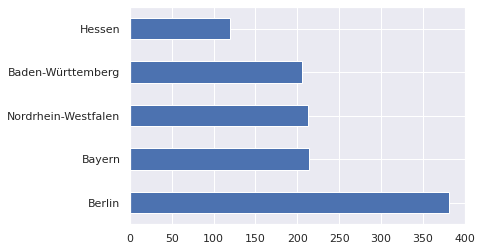

In [ ]:
state = df['State/county'].value_counts()
print(state.head(7)) 
state.head().plot(kind='barh')

50.0     35
100.0    33
500.0    13
150.0    10
200.0     9
Name: Amount invoiced users, dtype: int64


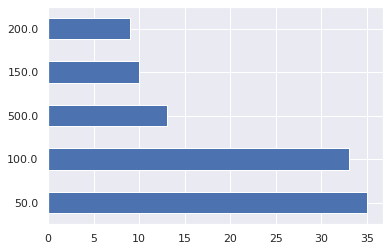

In [ ]:
users = df['Amount invoiced users'].value_counts()
print(users.head())
users.head().plot(kind='barh')


Contracted Signed                  98
Testphase                          62
Partner Free                       32
SAAS                               27
Partner Paid                       10
Lost                                7
Contracted Signed, Partner Paid     1
Name: Contract Status, dtype: int64


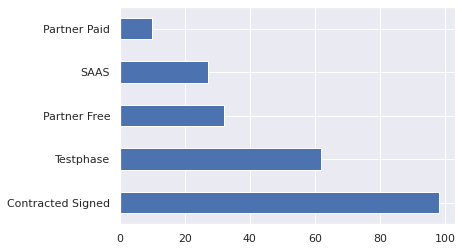

In [ ]:
Contract_Status = df['Contract Status'].value_counts()
print(Contract_Status)  
Contract_Status.head().plot(kind='barh')


In [ ]:
grouby_leads = df.groupby(['Lead Source'])

grouby_leads_waldman = grouby_leads.get_group('Waldmann')

print(grouby_leads_waldman['Amount invoiced users'].describe())



count      35.000000
mean      309.914286
std       568.255709
min         0.000000
25%        42.500000
50%       100.000000
75%       340.000000
max      3000.000000
Name: Amount invoiced users, dtype: float64


In [ ]:
grouby_leads_partner = grouby_leads.get_group('LIZ Partner')

grouby_leads_partner['Amount invoiced users'].describe()

count      46.000000
mean      697.217391
std      1303.826964
min         0.000000
25%       100.000000
50%       200.000000
75%       575.000000
max      7500.000000
Name: Amount invoiced users, dtype: float64

In [ ]:
grouby_leads_online = grouby_leads.get_group('LIZ online')

grouby_leads_online['Amount invoiced users'].describe()

count       82.000000
mean      1171.682927
std       4758.784537
min          0.000000
25%         50.000000
50%        100.000000
75%        250.000000
max      39000.000000
Name: Amount invoiced users, dtype: float64

In [ ]:
grouby_leads_direct = grouby_leads.get_group('LIZ direct')

grouby_leads_direct['Amount invoiced users'].describe()


count      45.000000
mean      326.800000
std       808.323816
min         0.000000
25%        50.000000
50%       100.000000
75%       200.000000
max      5000.000000
Name: Amount invoiced users, dtype: float64

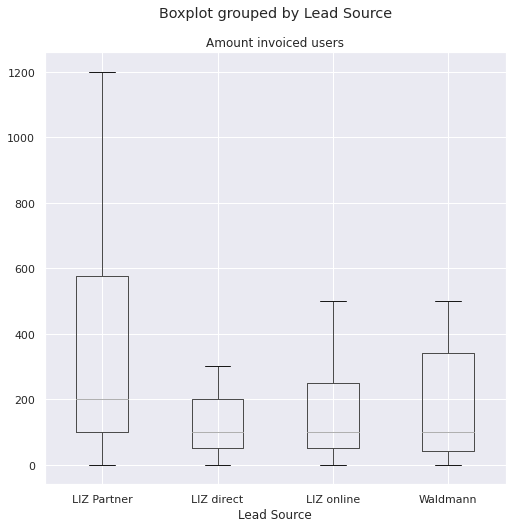

In [ ]:
df.boxplot(column="Amount invoiced users", by="Lead Source", showfliers=False,figsize=(8, 8))


In [ ]:
df_won__ = df[df["Amount invoiced users"]>= 100]
df_lost__ = df[df["Amount invoiced users"].isnull()]


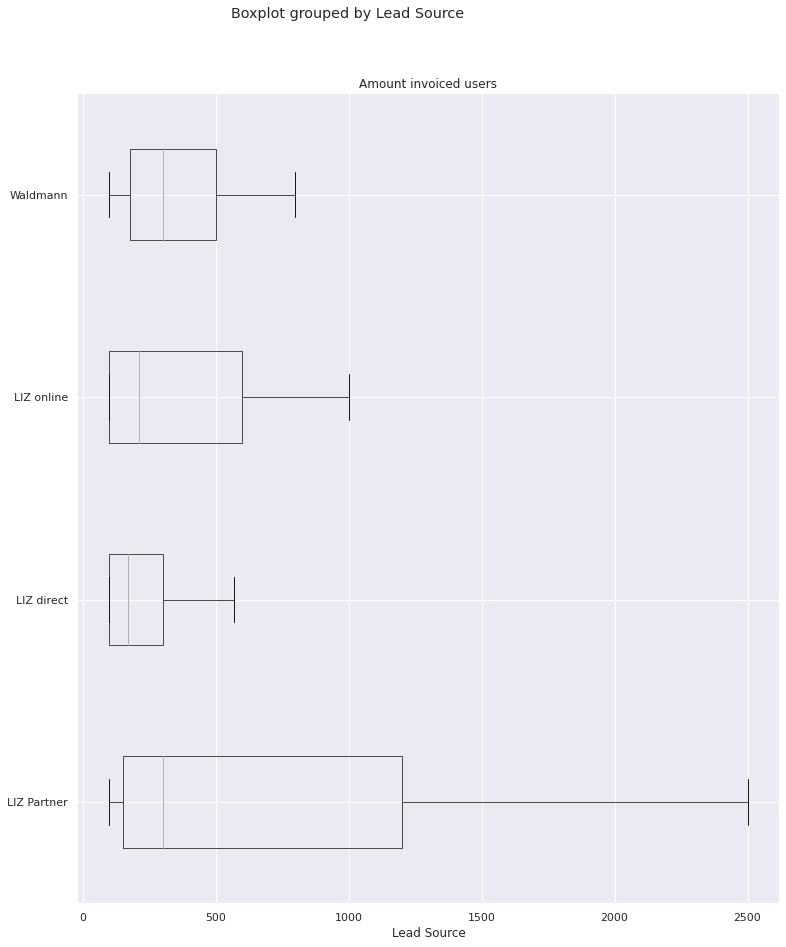

In [ ]:
df_won__.boxplot(column="Amount invoiced users", by="Lead Source", showfliers=False, vert=False, figsize=(15, 15))
plt.subplots_adjust(left=0.25)
plt.show()


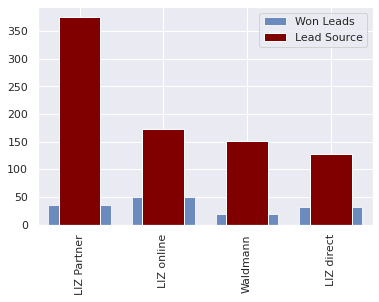

In [ ]:
df_create =  {'Won': ['LIZ online', 'LIZ Partner', 'LIZ direct', 'Waldmann'], 'Won Leads': [35, 50, 19, 31]}  
df_create = pd.DataFrame(df_create)  


df_create['Won Leads'].plot(kind='bar', width=.75, legend=True, alpha=0.8)

df['Lead Source'].value_counts().plot(color='maroon', kind='bar', width=.5, alpha=1, legend=True)


# All Leads
# LIZ Partner    375
# LIZ online     173
# Waldmann       152
# LIZ direct     127

# All Won
# LIZ online     50
# LIZ Partner    35
# LIZ direct     31
# Waldmann       19


In [ ]:
df_won__['Lead Source'].value_counts()

LIZ online     50
LIZ Partner    35
LIZ direct     31
Waldmann       19
Name: Lead Source, dtype: int64

In [ ]:
grouby_state = df.groupby(['State/county'])

grouby_leads_berlin = grouby_state.get_group('Berlin')

grouby_leads_berlin['Amount invoiced users'].describe()

count       32.000000
mean       686.250000
std       2824.994388
min         15.000000
25%         65.000000
50%        100.000000
75%        150.000000
max      16000.000000
Name: Amount invoiced users, dtype: float64

In [ ]:
grouby_state = df.groupby(['State/county'])

grouby_leads_Bayern = grouby_state.get_group('Bayern')

grouby_leads_Bayern['Amount invoiced users'].describe()

count     23.000000
mean     261.652174
std      246.162476
min        0.000000
25%       80.000000
50%      200.000000
75%      500.000000
max      800.000000
Name: Amount invoiced users, dtype: float64

In [ ]:
grouby_state = df.groupby(['State/county'])

grouby_leads_NordrheinWestfalen = grouby_state.get_group('Nordrhein-Westfalen')

grouby_leads_NordrheinWestfalen['Amount invoiced users'].describe()

In [ ]:
grouby_state = df.groupby(['State/county'])

grouby_leads_BadenWürttemberg = grouby_state.get_group('Baden-Württemberg')

grouby_leads_BadenWürttemberg['Amount invoiced users'].describe()

count       25.000000
mean      1979.320000
std       7743.058901
min          5.000000
25%         80.000000
50%        153.000000
75%        400.000000
max      39000.000000
Name: Amount invoiced users, dtype: float64

In [ ]:
grouby_state = df.groupby(['State/county'])

grouby_leads_Hessen = grouby_state.get_group('Hessen')

grouby_leads_Hessen['Amount invoiced users'].describe()

count      12.000000
mean      934.000000
std      2184.180354
min        10.000000
25%        36.250000
50%        62.500000
75%       337.500000
max      7500.000000
Name: Amount invoiced users, dtype: float64

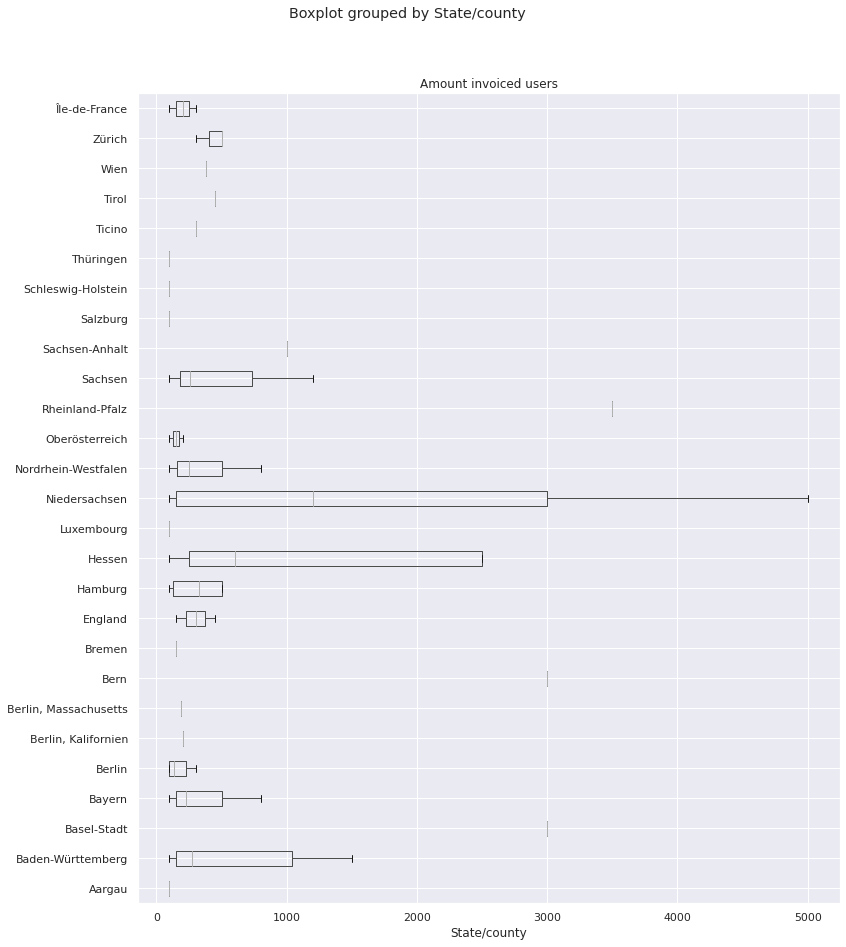

In [ ]:
# df_state_box_ = df[df['State/county'] != 'Berlin'  | 
#                    df['State/county'] != 'Bayern'| 
#                    df['State/county'] != 'Nordrhein-Westfalen'| 
#                    df['State/county'] != 'Baden-Württemberg'| 
#                    df['State/county'] != 'Hessen']
# df_won__ = df[df["Amount invoiced users"]>= 5]
# df_lost__ = df[df["Amount invoiced users"].notnull()]



# df_state_box_ = df.drop(df[df['State/county'] != "Berlin" or !="Bayern" or !="Nordrhein-Westfalen" or !="Baden-Württemberg" or !="Hessen"] .index, inplace = True)


# df_state_box_["State/county"].value_counts()
df_won__.index = df_won__["Amount invoiced users"]

df_won__.boxplot(column="Amount invoiced users", by="State/county", showfliers=False, vert=False, figsize=(15, 15))
plt.subplots_adjust(left=0.25)
plt.show()

# Berlin                 381
# Bayern                 214
# Nordrhein-Westfalen    213
# Baden-Württemberg      205
# Hessen                 120
# Niedersachsen           64
# Hamburg                 63


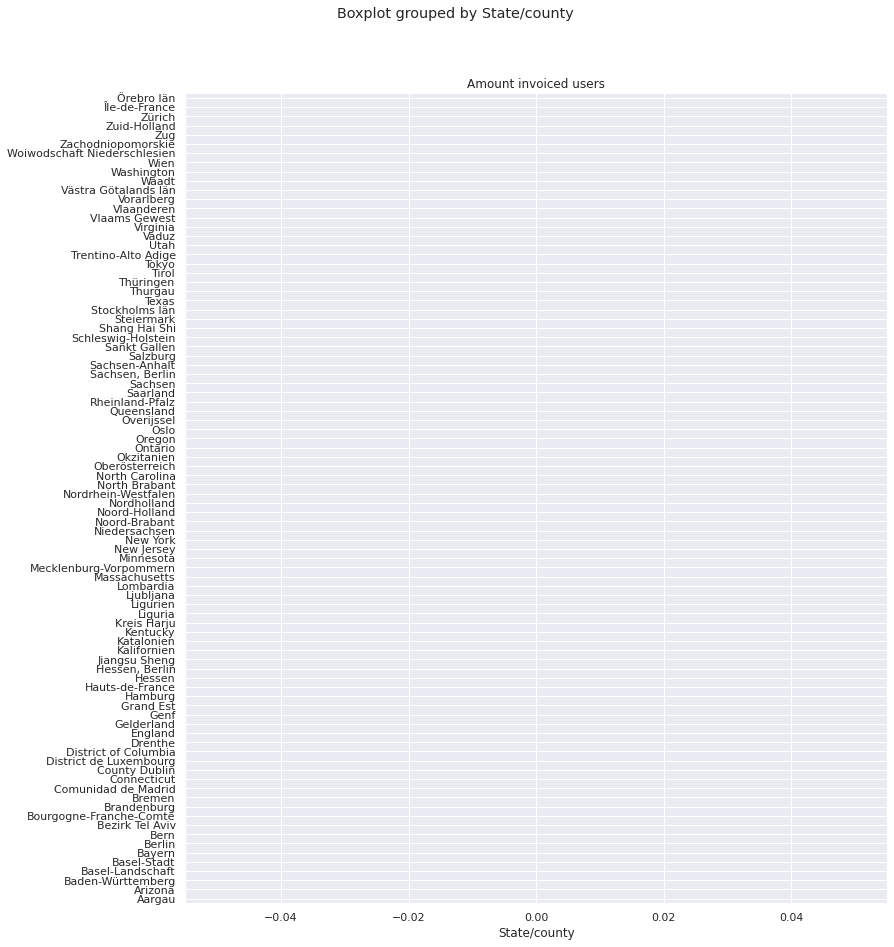

In [ ]:
df_lost__.boxplot(column="Amount invoiced users", by="State/county", showfliers=False, vert=False, figsize=(15, 15))
plt.subplots_adjust(left=0.25)
plt.show()

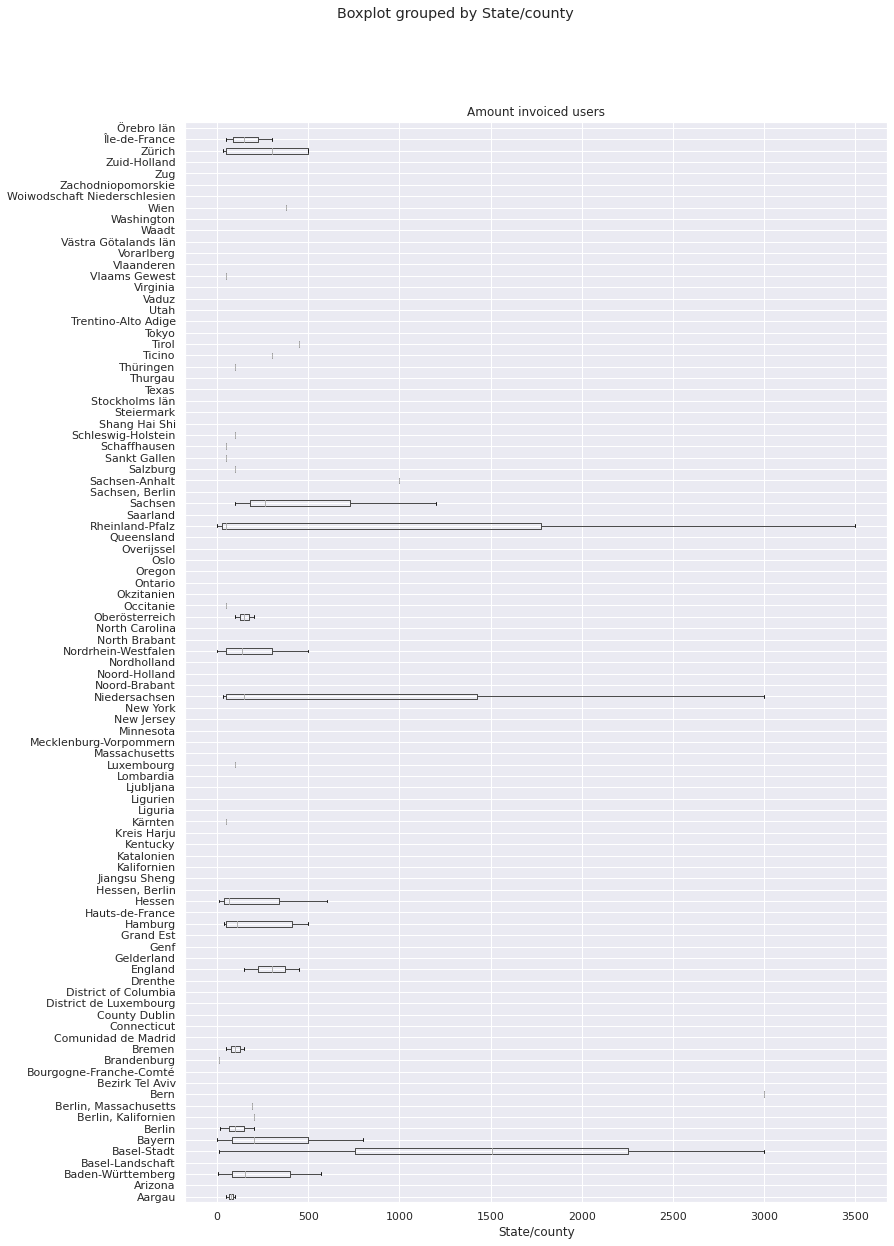

In [ ]:
df.boxplot(column="Amount invoiced users", by="State/county", showfliers=False, vert=False, figsize=(15, 20))
plt.subplots_adjust(left=0.25)
plt.show()

In [ ]:
grouby_leads_state = df.groupby(['Lead Source'])

grouby_leads_state_waldman = grouby_leads_state.get_group('Waldmann')

grouby_leads_state_waldman['State/county'].describe()

count                   138
unique                   32
top       Baden-Württemberg
freq                     43
Name: State/county, dtype: object

In [ ]:
grouby_leads_state = df.groupby(['Lead Source'])

grouby_leads_state_partner = grouby_leads_state.get_group('LIZ Partner')

grouby_leads_state_partner['State/county'].describe()

count        296
unique        50
top       Berlin
freq          98
Name: State/county, dtype: object

In [ ]:
grouby_leads_state = df.groupby(['Lead Source'])

grouby_leads_state_online = grouby_leads_state.get_group('LIZ online')

grouby_leads_state_online['State/county'].describe()

count                     146
unique                     21
top       Nordrhein-Westfalen
freq                       28
Name: State/county, dtype: object

In [ ]:
grouby_leads_state = df.groupby(['Lead Source'])

grouby_leads_state_direct = grouby_leads_state.get_group('LIZ direct')

grouby_leads_state_direct['State/county'].describe()

count        110
unique        28
top       Berlin
freq          23
Name: State/county, dtype: object

In [ ]:
grouby_leads_state_emails = df.groupby(['Lead Source'])

grouby_leads_state_emails_direct = grouby_leads_state_emails.get_group('LIZ direct')

grouby_leads_state_direct['Email messages count'].describe()



count      127.000000
mean       228.748031
std       1984.005080
min          0.000000
25%          1.000000
50%          6.000000
75%         26.500000
max      22298.000000
Name: Email messages count, dtype: float64

In [ ]:
grouby_leads_state_emails = df.groupby(['Lead Source'])

grouby_leads_state_emails_Waldmann = grouby_leads_state_emails.get_group('Waldmann')

grouby_leads_state_emails_Waldmann['Email messages count'].describe()



count     152.000000
mean       33.342105
std       125.926295
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1332.000000
Name: Email messages count, dtype: float64

In [ ]:
grouby_leads_state_emails = df.groupby(['Lead Source'])

grouby_leads_state_emails_Partner = grouby_leads_state_emails.get_group('LIZ Partner')

grouby_leads_state_emails_Partner['Email messages count'].describe()



count    375.000000
mean      12.949333
std       37.920760
min        0.000000
25%        2.000000
50%        6.000000
75%       12.000000
max      567.000000
Name: Email messages count, dtype: float64

In [ ]:
grouby_leads_state_emails = df.groupby(['Lead Source'])

grouby_leads_state_emails_online = grouby_leads_state_emails.get_group('LIZ online')

grouby_leads_state_emails_online['Email messages count'].describe()



count    173.000000
mean      25.005780
std       43.580252
min        0.000000
25%        3.000000
50%        7.000000
75%       27.000000
max      324.000000
Name: Email messages count, dtype: float64

In [ ]:
df_won__['Lead Source'].value_counts()


LIZ online     50
LIZ Partner    35
LIZ direct     31
Waldmann       19
Name: Lead Source, dtype: int64

In [ ]:
df_won__['LIZ Sales Mitarbeiter'].value_counts()


Jaana Moser        32
Martin Domschke    28
Eric Schäfer       19
Jens Kühn           9
Erik Schäfer        2
Jens                1
Jaana               1
Name: LIZ Sales Mitarbeiter, dtype: int64

In [ ]:
df_won__['LIZ Sales Mitarbeiter'].value_counts()


Jaana Moser        32
Martin Domschke    28
Eric Schäfer       19
Jens Kühn           9
Erik Schäfer        2
Jens                1
Jaana               1
Name: LIZ Sales Mitarbeiter, dtype: int64

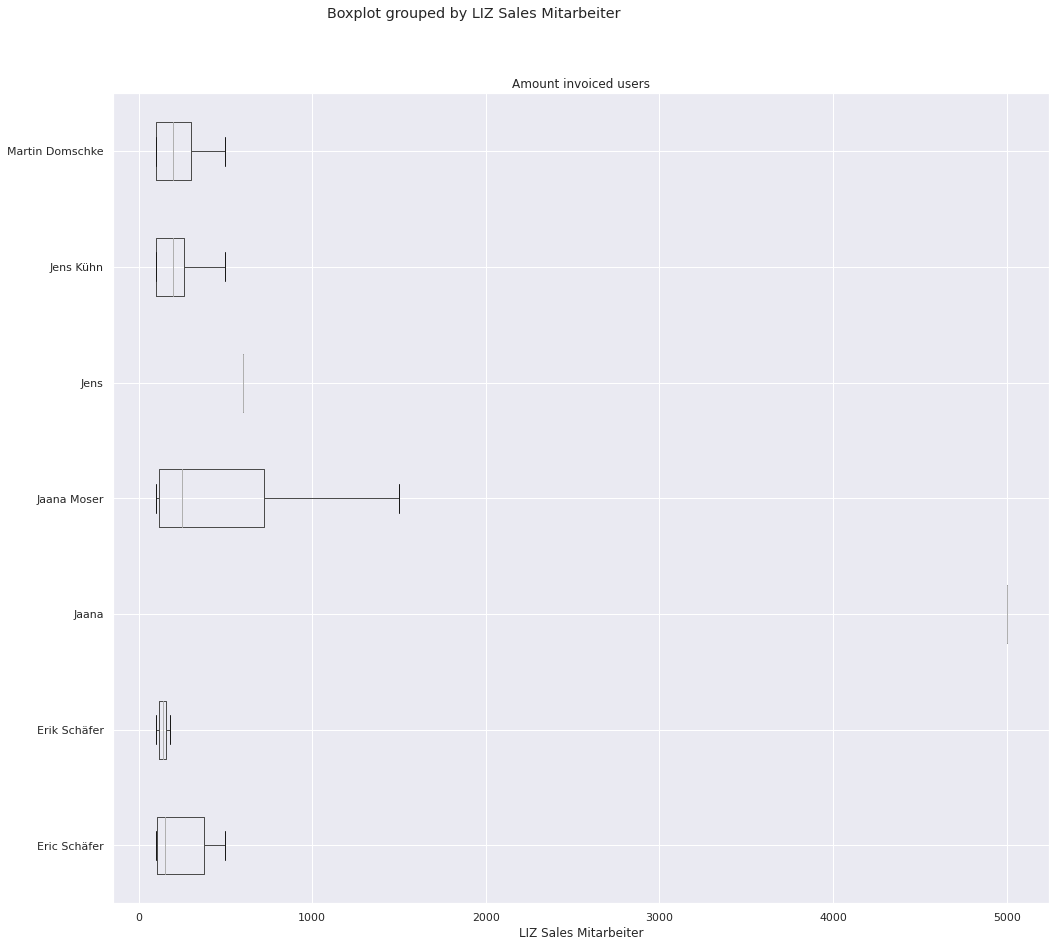

In [ ]:
df_won__.boxplot(column="Amount invoiced users", by="LIZ Sales Mitarbeiter", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

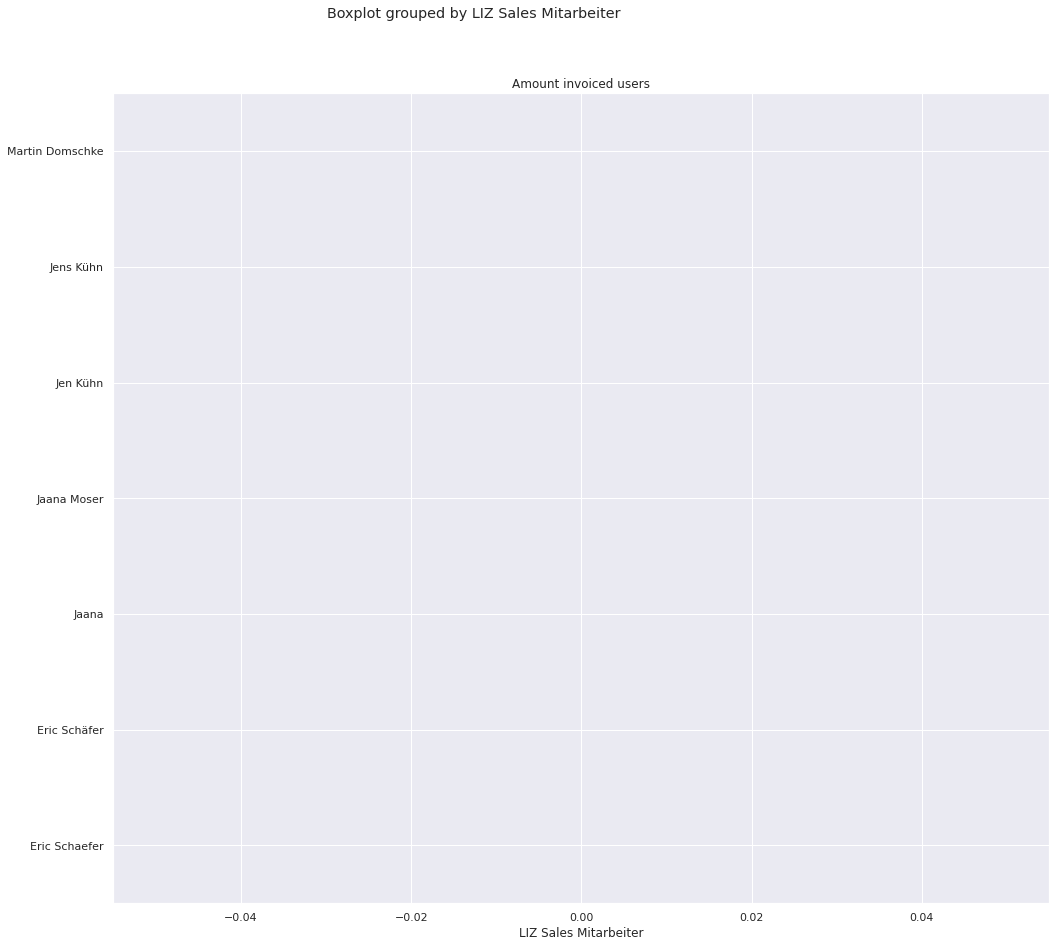

In [ ]:
df_lost__.boxplot(column="Amount invoiced users", by="LIZ Sales Mitarbeiter", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

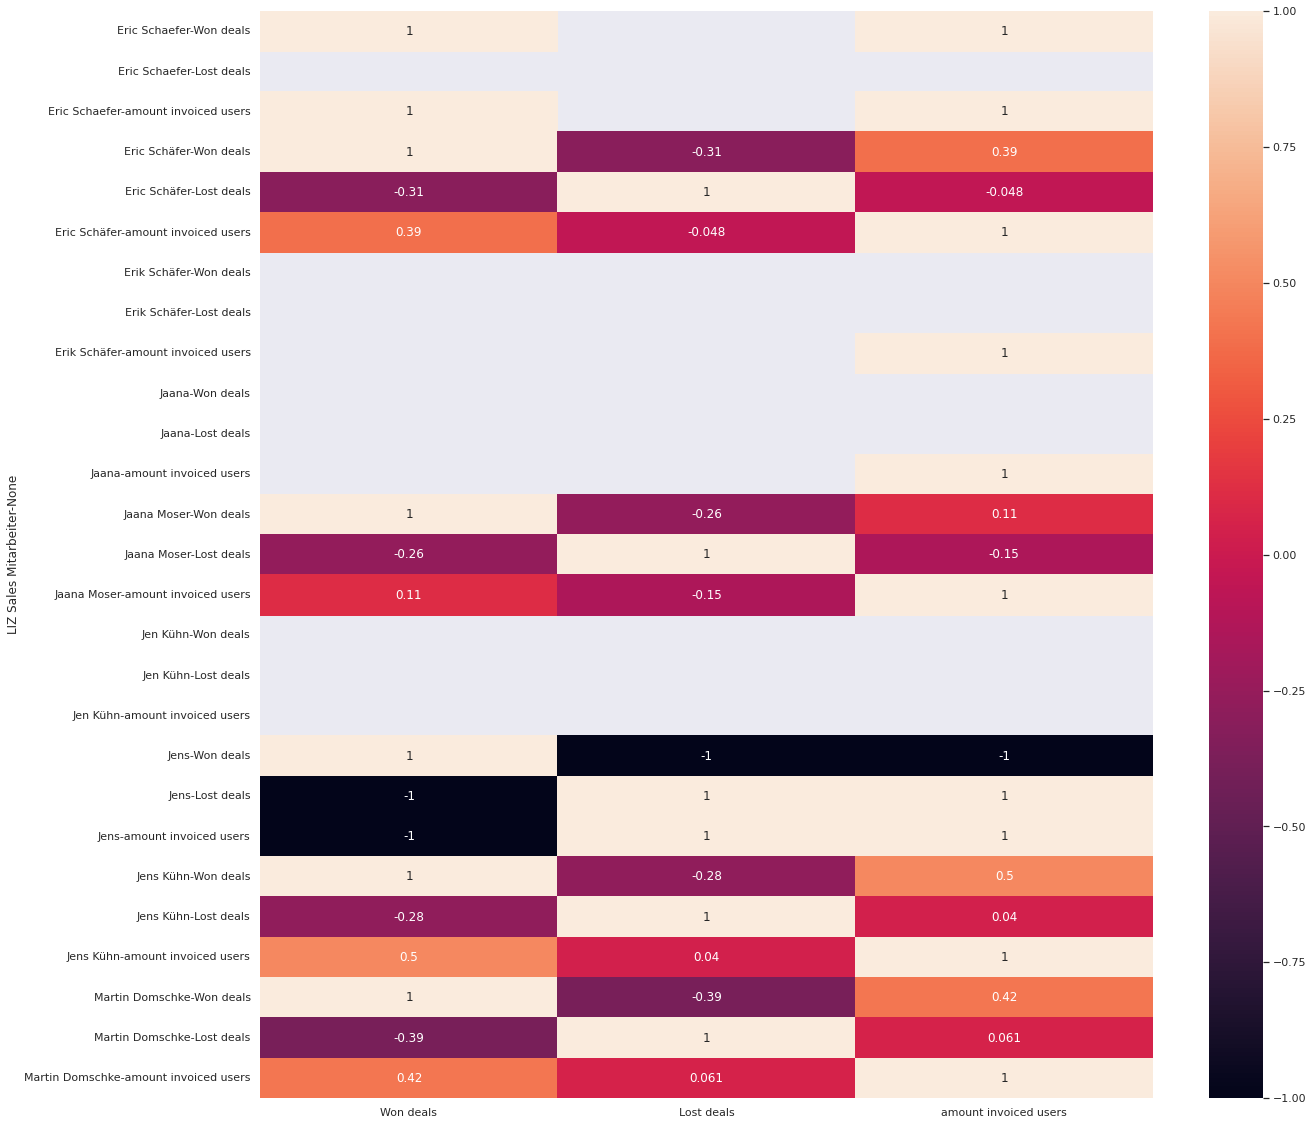

In [ ]:
grouby_workers = df
grouby_workers["Amount invoiced users"] = pd.Categorical(grouby_workers["Amount invoiced users"])
grouby_workers['amount invoiced users'] = grouby_workers["Amount invoiced users"].cat.codes
grouby_workers = df.groupby(['LIZ Sales Mitarbeiter'])


corr_matrix = grouby_workers["Won deals", "Lost deals", "amount invoiced users"].corr()
fig, ax = plt.subplots(figsize=(20,20))         
sn.heatmap(corr_matrix,annot=True) #annot=True

plt.show()

In [ ]:
df_changed = df
df_changed["State/county"] = pd.Categorical(df_changed["State/county"])
df_changed['State'] = df_changed["State/county"].cat.codes

df_changed["Lead Source"] = pd.Categorical(df_changed["Lead Source"])
df_changed['lead source'] = df_changed["Lead Source"].cat.codes

df_changed["Amount invoiced users"] = pd.Categorical(df_changed["Amount invoiced users"])
df_changed['amount invoiced users'] = df_changed["Amount invoiced users"].cat.codes

df_changed["Kunden Typ"] = pd.Categorical(df_changed["Kunden Typ"])
df_changed['kunden Typ'] = df_changed["Kunden Typ"].cat.codes

df_changed["LIZ Sales Mitarbeiter"] = pd.Categorical(df_changed["LIZ Sales Mitarbeiter"])
df_changed['LIZ sales Mitarbeiter'] = df_changed["LIZ Sales Mitarbeiter"].cat.codes

df_changed["LIZ Sales Mitarbeiter"] = pd.Categorical(df_changed["LIZ Sales Mitarbeiter"])
df_changed['LIZ sales Mitarbeiter'] = df_changed["LIZ Sales Mitarbeiter"].cat.codes

df_changed["Branche"] = pd.Categorical(df_changed["Branche"])
df_changed['Branch'] = df_changed["Branche"].cat.codes


df_changed["Won deals"] = pd.Categorical(df_changed["Won deals"])
df_changed['won deals'] = df_changed["Won deals"].cat.codes


In [ ]:
# del df_changed["code"]
Branche


IT Services and IT Consulting                                 328
consulting                                                    235
IT and Services                                               134
Financial Services                                            130
Technology, Information and Internet                          118
                                                             ... 
Recreational Facilities                                         1
IT Services and IT Consulting, Retail                           1
Medical Equipment Manufacturing, Hospitals and Health Care      1
Nursing Homes and Residential Care Facilities                   1
Construction;Information Technology;Software                    1
Name: Branche, Length: 348, dtype: int64

In [ ]:
df_won__['Branche'].value_counts()

Verlag                                                                      2
Agentur                                                                     2
Financial Services                                                          1
StartUp, Software Development                                               1
Konzern                                                                     1
KMU                                                                         1
Bank                                                                        1
Software                                                                    1
Pharma                                                                      1
Mobility                                                                    1
Utilities                                                                   1
Motor Vehicle Manufacturing                                                 1
IT Services and IT Consulting                                   

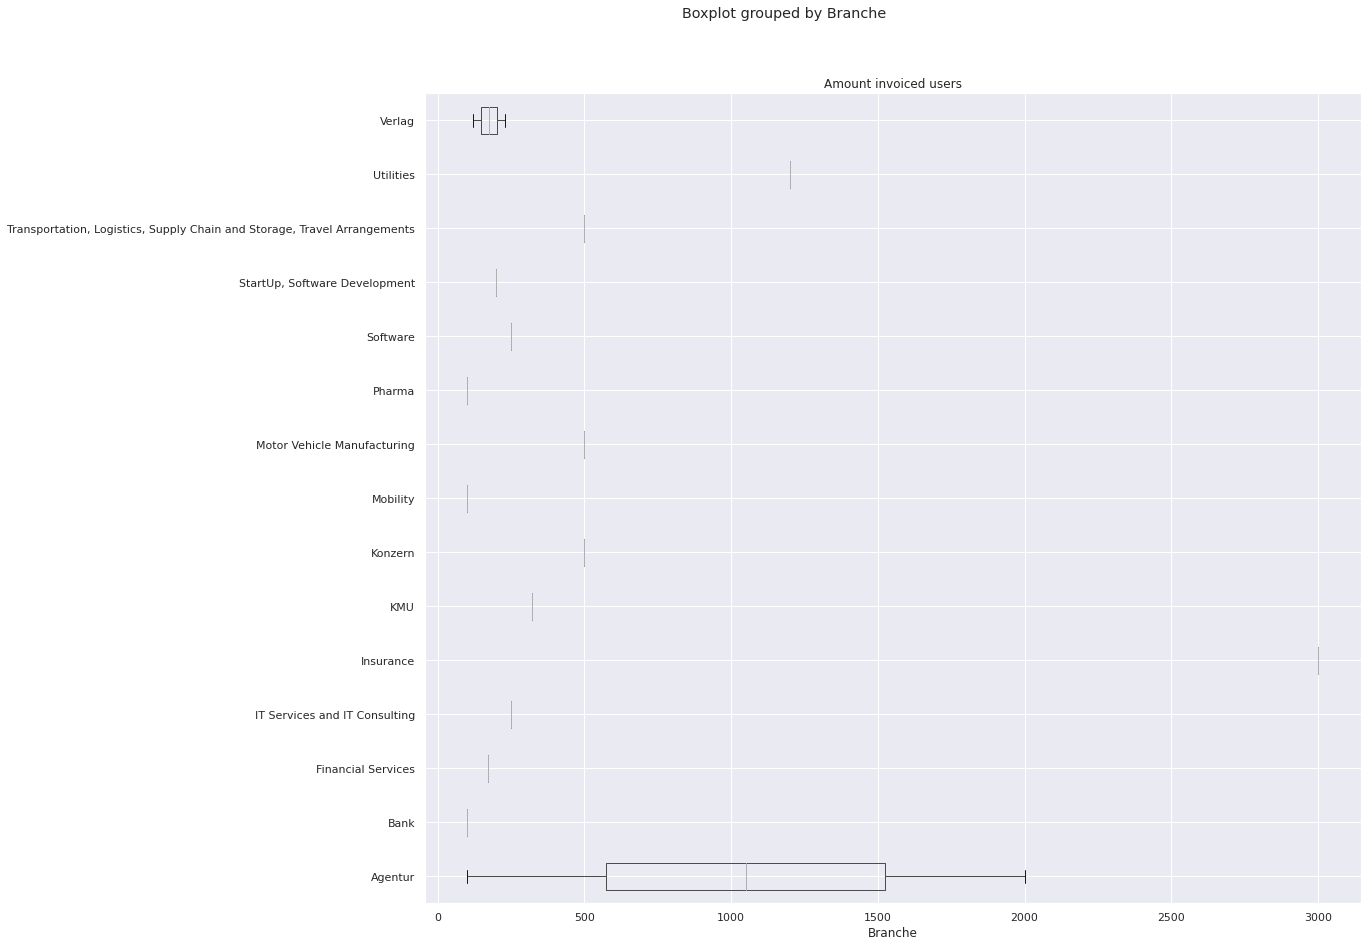

In [ ]:
df_won__.boxplot(column="Amount invoiced users", by="Branche", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

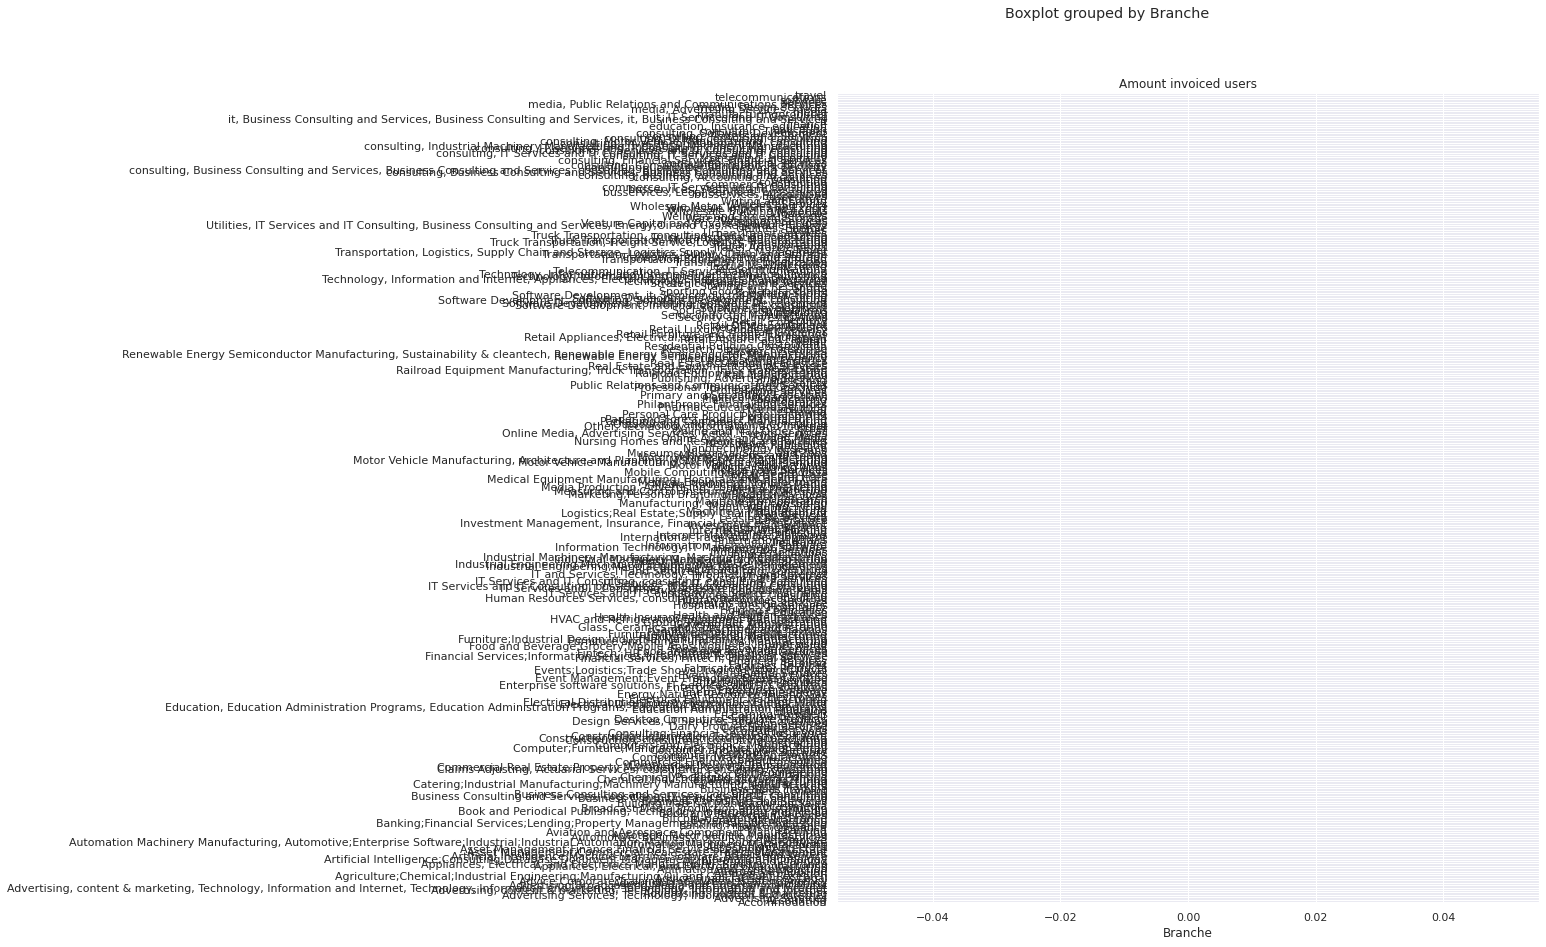

In [ ]:
df_lost__.boxplot(column="Amount invoiced users", by="Branche", showfliers=False, vert=False, figsize=(15, 15))
plt.subplots_adjust(left=0.25)
plt.show()

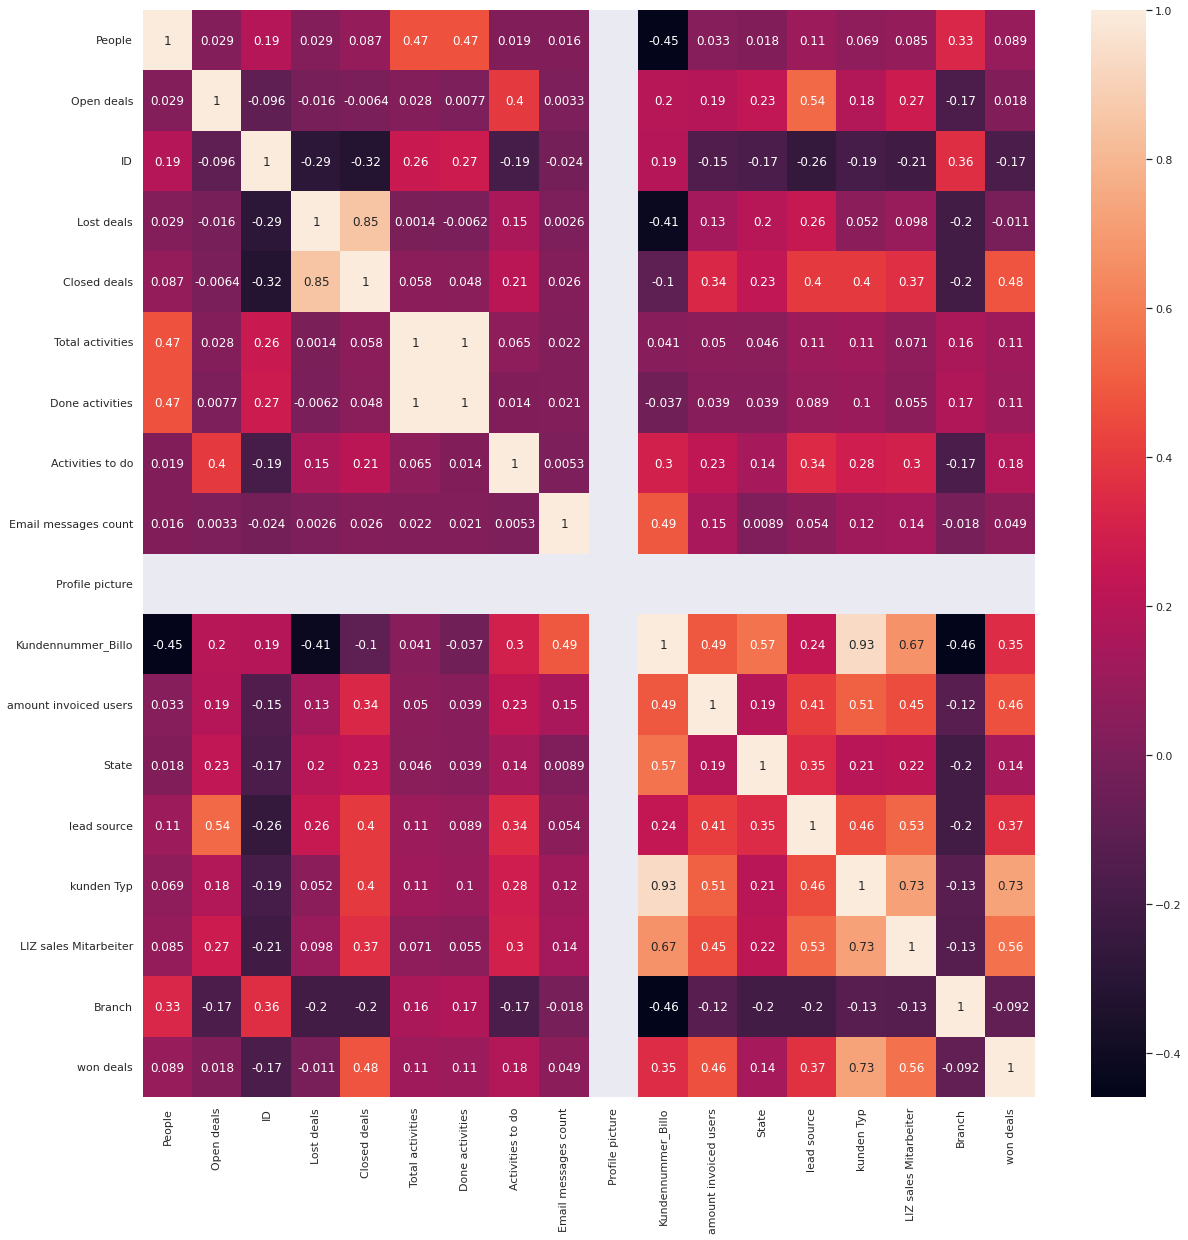

In [ ]:
corr_matrix = df_changed.corr()
fig, ax = plt.subplots(figsize=(20,20))         
sn.heatmap(corr_matrix,annot=True) #annot=True

plt.show()

In [ ]:
# df_new = df[df['Amount invoiced users'].notna()]
# df_new = df[df["Amount invoiced users"] <= 3000.0]
df_new = df_new[df_new['Branche'].notna()]

df_new["Branche"] = pd.Categorical(df_new["Branche"])
df_new['Branch'] = df_new["Branche"].cat.codes
x = df_new["Branch"]
y = df_new["Amount invoiced users"]
min(y)

df_new = df_new.reset_index()
df.drop(['amount invoiced users'], axis=1)

df.to_csv("nice.csv")

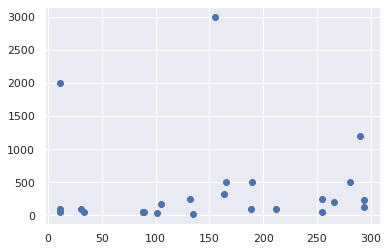

In [ ]:
plt.scatter(x, y)
plt.show()

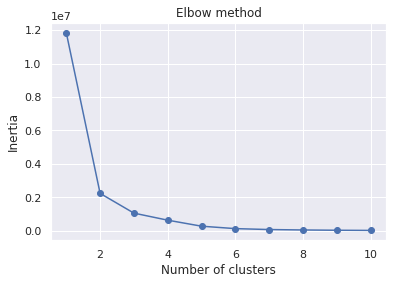

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

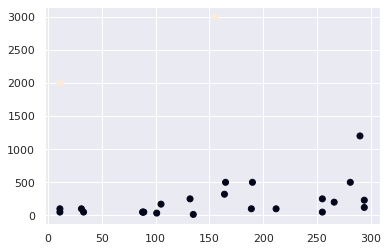

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
import matplotlib.pyplot


plt.scatter(x, y, c=kmeans.labels_)
plt.show()

PART 2 

In [ ]:
df_80_won = pd.read_csv("80%and_more_won.csv")
pd.set_option('display.max_columns', None)
df_80_won.head(50)


Deal - Title  Deal - Value  \
0                                    Solarisbank Deal         716.0   
1                                        Afry CH Deal         475.0   
2                                   Handelsblatt Deal        2079.0   
3                             Droemer Knaur GmbH Deal         526.0   
4                                  Landmarken AG Deal         568.0   
5                        Walter Schuhmacher GmbH Deal         129.0   
6                          InterComponentWare AG Deal         229.0   
7                           AKKA GmbH & Co. KGaA Deal        2205.0   
8                                      Logicheck Deal         101.5   
9                                         DUALIS Deal         179.0   
10                          Neugelb Studios GmbH Deal         229.0   
11  HGV Hanseatische Gesellschaft für Verlagsservi...         275.0   
12                                      NIKIN AG Deal         179.0   
13                        Noordtec GmbH & Co. KG Lead         114.0   
14                                     ATCS GmbH Deal         114.5   
15                                       Afry UK Deal         229.0   
16                            Carfax Europe GmbH Deal         119.0   
17                        Gambit Consulting GmbH Lead         298.0   
18                                       Group M Deal        2400.0   
19             Dussmann Service Deutschland GmbH Deal         179.0   
20                        SWS Computersysteme AG Deal         710.0   
21                                     Aesculap Pilot         165.0   
22                            meinestadt.de GmbH Deal         664.7   
23                                   Getec Group Deal        1990.0   
24                                     MDR Media GmbH         253.0   
25                             Bosch Ludwigsburg Deal         857.0   
26  IZ Immobilien Zeitung Verlagsgesellschaft mbH ...         120.0   
27                                    Afry Italy Deal          89.0   
28                    Galderma Laboratorium GmbH Deal         229.0   
29                                 FLOWBIRD Deal (FR)         627.0   
30                           Kondor Wessels GmbH Deal          57.0   
31                              Wacker Neuson SE Deal         179.0   
32                                       ICAS AG Deal         115.0   
33                          Dr. Loges + Co. GmbH Deal         269.0   
34                 W+P workspace consulting GmbH Deal          94.0   
35                        AFRY Group Denmark A/S Deal         179.0   
36                              IHK Digital GmbH Deal         289.0   
37                  EDG Deutschland Service GmbH Deal         209.0   
38                            Cabinet SAADI Deal (FR)          89.5   
39                                    merTens AG Deal         206.2   
40                    Psychatrie St. Gallen Nord Deal         165.0   
41                       orangery Coworking GmbH Deal         127.0   
42                                     RSM Düsseldorf         137.4   

                                  Deal - Organization Deal - Contact person  \
0                                      Solarisbank AG  Sandra Schaarschmidt   
1                                             AFRY CH         Luzius Bütler   
2              HANDELSBLATT MEDIA GROUP GMBH & CO. KG                   NaN   
3           Verlagsgruppe Droemer Knaur GmbH & Co. KG          Corinna Wild   
4                                       Landmarken AG         Julian Schain   
5                              Walter Schumacher GmbH         Lars Andresen   
6              x-tension Informationstechnologie GmbH           Regina Hipp   
7                                AKKA GmbH & Co. KGaA         Thomas Seeber   
8                                           Logicheck          Lara Fischer   
9                             DUALIS GmbH IT Solution            Reik Zettl   
10                               Neugelb Studio

In [ ]:
print(df_80_won.describe())


       Deal - Value
count     43.000000
mean     445.693023
std      594.150682
min       57.000000
25%      128.000000
50%      209.000000
75%      500.500000
max     2400.000000


In [ ]:
df_80_lost = pd.read_csv("80_lost.csv")
pd.set_option('display.max_columns', None)
df_80_lost.head(50)


Deal - Title  Deal - Value  \
0                                      MERCK C10 Deal        3200.0   
1                                            ELE Deal           0.0   
2                                   doctari GmbH Deal        6768.0   
3                         Auswärtiges Amt Brandenburg        7282.0   
4   SMG Standortmarketing Gesellschaft Landkreis M...        2050.0   
5                                           DZ-4 Deal        2100.0   
6                                  CDM Smith USA Deal       44856.0   
7                   Bock Handelsunternehmen GmbH Deal           0.0   
8                          DKB Code Factory GmbH Deal        8640.0   
9                                 PIABO PR GmbH  Deal        1068.0   
10                Leffers Modehaus GmbH & Co. KG Deal         869.4   
11            Interstuhl Büromöbel GmbH & Co. KG Deal           0.0   
12                             AFRY ERŐTERV ZRt. Deal        2148.0   
13                             VDV-Akademie GmbH Deal        1080.0   
14                               AFRY Finland Oy Deal        3121.2   

                                  Deal - Organization  \
0                                          Merck KGaA   
1                          Emscher Lippe Energie GmbH   
2                                       doctari group   
3                                         Arcers GmbH   
4   SMG Standortmarketing Gesellschaft Landkreis M...   
5                                                DZ-4   
6                              CDM Smith Consult GmbH   
7                        Bock Handelsunternehmen GmbH   
8                               DKB Code Factory GmbH   
9                                       PIABO PR GmbH   
10                     Leffers Modehaus GmbH & Co. KG   
11                 Interstuhl Büromöbel GmbH & Co. KG   
12                                               AFRY   
13                                  VDV-Akademie GmbH   
14                                               AFRY   

                        Deal - Contact person Deal - Expected close date  \
0                                James Bourke                 2023-06-01   
1                             Markus Thiemann                        NaN   
2                         Timo Ehrenbrusthoff                 2021-06-01   
3   Dipl.-Ing. (FH) Architekt Heiko Wiesensee                 2021-07-05   
4                           Theresa Schwaiger                 2021-07-01   
5                              Alicia Margner                 2021-12-01   
6                                         Tim                 2021-09-01   
7                                Steffen Bock                 2022-01-10   
8                             Thomas Holstein                 2022-04-01   
9                               Marina Luedke                 2021-11-01   
10                                    Novicic                 2021-12-21   
11                                        NaN                 2022-02-01   
12                                Zsolt Makai                 2022-03-01   
13                              Sandra Raider                 2022-04-04   
14                               Marko Saarni                 2023-02-01   

   Deal - Next activity date     Deal - Owner  
0                        NaN  Martin Domschke  
1                        NaN      Jaana Moser  
2                        NaN  Martin Domschke  
3                        NaN      Jaana Moser  
4                        NaN      Jaana Moser  
5                        NaN     Eric Schäfer  
6                        NaN  Martin Domschke  
7                 2022-05-27        Jens Kühn  
8                        NaN     Eric Schäfer  
9                 2023-04-05     Eric Schäfer  
10                       NaN      Jaana Moser  
11                       NaN      Jaana Moser  
12                       NaN  Martin Domschke  
13                       NaN      Jaana Moser  
14                       NaN  Martin Domschke

In [ ]:
print(df_80_lost.describe())


       Deal - Value
count     15.000000
mean    5545.506667
std    11213.910988
min        0.000000
25%      968.700000
50%     2100.000000
75%     4984.000000
max    44856.000000


In [ ]:
change_percent = ((float(15)-58)/58)*-100
change_percent

74.13793103448276

In [ ]:
df_50_to_80_won = pd.read_csv("50_to_80_won.csv")
pd.set_option('display.max_columns', None)
df_50_to_80_won.head(50)


Deal - Title  Deal - Value  \
0                       Energie Steiermark AG Deal         171.0   
1                                HYAZINTH LLP Deal         100.0   
2                                Evangelische Deal         249.0   
3                     GRTgaz Deutschland GmbH Deal         268.0   
4                                   Snipes SE Deal         474.0   
5          Kyocera Fineceramis Precision GmbH Deal         285.0   
6                                Energie Calw Deal          89.0   
7   Deutscher Industrie- und Handelskammertag Deal         215.0   
8                      Rolls Royce electrical Deal         549.1   
9                                         EFS Deal        1030.0   
10                          AFRY Austria GmbH Deal         229.0   
11                                       Sobi Deal         179.0   
12               Pilot Hamburg Gmbh Und Co Kg Lead         892.0   
13         FMS Future Mobility Solutions GmbH Deal         179.0   
14                            Robert C. Spies Deal         269.0   
15     Senatsverwaltung für Inneres und Sport Deal         179.0   
16                        VASATASCHRÖDER GmbH Deal          90.0   
17             Bruker Daltonics GmbH & Co. KG Deal          90.0   
18      PEAC Holdings (Germany) GmbH & Co. KG Deal         538.0   
19                    VARTA Microbattery GmbH Deal         144.5   
20                      Nassauische Sparkasse Deal         592.0   
21                         GWQ ServicePlus AG Deal         220.0   
22                                 Dachser SE Deal         144.5   
23                                Webrepublic Deal         616.0   
24                              Sunzinet GmbH Deal         179.0   
25                             Smartlane GmbH Deal         130.0   
26                                  Getpliant Deal         289.0   
27                       Leonine Holding GmbH Deal        1032.0   
28                              Acrolinx GmbH Deal         549.0   
29                                Trinks GmbH Deal         179.0   
30                                       ALSO Deal         825.0   
31      Reputatio systems GmbH & Co. KG PILOT Deal         171.0   
32               SPH AG e-Commerce Systemhaus Deal         329.0   

                                  Deal - Organization  Deal - Contact person  \
0                               Energie Steiermark AG          Erich Schober   
1   HYAZINTH Partnerschaft von Rechtsanwälten mbB ...            Melisa Uzel   
2                Evangelische Stiftung Pflege Schönau     Alexander Wittmann   
3                             GRTgaz Deutschland GmbH                    NaN   
4                                           Snipes SE              Eric Fuks   
5                  Kyocera Fineceramis Precision GmbH            Petra Gabor   
6                                   Energie Calw GmbH            Patrik Jauß   
7                                   DIHK Service GmbH           Julia Stobbe   
8                 Rolls-Royce Deutschland Ltd & Co KG      Manuel Schumacher   
9                                   e:fs TechHub GmbH     Andreas Stiglmaier   
10                                  AFRY Austria GmbH   Johannes Dölzlmüller   
11                                               Sobi        Antje Antretter   
12                       Pilot Hamburg Gmbh Und Co Kg            Berit Beier   
13                 FMS Future Mobility Solutions GmbH                    NaN   
14                                    Robert C. Spies            Amelie Mann   
15             Senatsverwaltung für Inneres und Sport      Maximilian Aepler   
16                                VASATASCHRÖDER GmbH         Thomas Schieck   
17                     Bruker Daltonics GmbH & Co. KG     Christoph Hartmann   
18              PEAC Holdings (Germany) GmbH & Co. KG         Ilze Johansone   
19                            VARTA Microbattery GmbH         Linda Danowski   
20                              Nassauische S

In [ ]:
print(df_50_to_80_won.describe())


       Deal - Value
count     33.000000
mean     347.730303
std      273.669070
min       89.000000
25%      171.000000
50%      229.000000
75%      538.000000
max     1032.000000


In [ ]:
df_50_to_80_lost = pd.read_csv("50_to_80_lost.csv")
pd.set_option('display.max_columns', None)
df_50_to_80_lost.head(50)


Deal - Title  Deal - Value  \
0                                           Disy Deal        9396.0   
1                                   Della Chiara Deal        4400.0   
2                                    Taxfix GmbH Deal        4200.0   
3                               FrühstücksZwerge Deal       11700.0   
4                                          Fidor Deal        4188.0   
5                                            SDK Deal        7020.0   
6                                     BIM Berlin Deal        5000.0   
7                                      REGIOCAST Deal        9000.0   
8                                      DNV GL SE Deal       12000.0   
9                                Elac Sonar GmbH Deal        3228.0   
10                                Mobil ISC GmbH Deal        4188.0   
11                                    GRAMMER AG Deal         536.0   
12                                   Waldmann BV Deal       16620.0   
13                                     Umlaut SE Deal           0.0   
14                                Pierching GmbH Deal        2500.0   
15                        Shiji Deutschland GmbH Deal           0.0   
16                               Fidor Solutions Deal        3228.0   
17                                     Opta Data Deal       14956.0   
18                 b.i.g. gruppe management gmbh Deal        3200.0   
19                                          ASWO Deal        2148.0   
20                             PAIR Finance GmbH Deal        3200.0   
21                                    Aubex GmbH Deal        1530.0   
22                                      PTA GmbH Deal        2880.0   
23                              GOLDBECK Neuried Deal        1155.0   
24  Stadtwerke Verkehrsgesellschaft Frankfurt am M...       13440.0   
25                         MSIG Insurance Europe Deal        4188.0   
26                                       SBIT AG Deal        2148.0   
27                                           Zug Deal        6600.0   
28         Deltra Business Software GmbH & Co KG Deal        2198.0   
29                                        Leadec Deal         180.0   
30                                        Mizuho Deal        2148.0   
31             BRK Landesgeschäftsstelle München Deal        1000.0   
32                       NRW.Energy4Climate GmbH Deal        1368.0   
33                        I&U TV Produktion GmbH Deal        5011.0   
34                          Stadtwerke Gütersloh Deal        1068.0   
35                                      CID GmbH Deal        7140.0   
36  Neversa – Dienstleistungen für betriebliche Ve...        1074.0   
37       Handwerkskammer zu Köln ( Büro der Zukunft )           0.0   
38                                   Memodo GmbH Deal        4128.0   
39                               Stadtwerke Jena Deal        7200.0   
40              Glasfaser NordWest GmbH & Co. KG Lead         542.0   
41  Dataforce Verlagsgesellschaft für Business Inf...        2688.0   
42                        Clariant Produkte GmbH Deal        8736.0   
43  Haftpflichtverband öffentlicher Verkehrsbetrie...         263.0   
44                           Celonic GmbH&Co. KG Deal        6336.0   
45                             Hager Electro SAS Deal       65760.0   
46                            Claas Saulgau GmbH Deal        6500.0   
47                  SPH AG e-Commerce Systemhaus Deal        1288.0   
48                           Hapag Lloyd Hamburg Deal        2480.0   
49                                     Halter AG Deal         625.0   

                                  Deal - Organization  \
0                       Disy Informationssysteme GmbH   
1                     Waldmann Illuminotecnica S.r.l.   
2                                         Taxfix GmbH   
3                       Die FrühstücksZwerge DE Group   
4                                       Fidor Bank AG   
5                Süddeutsche Krankenversicherung a.G.   
6                  B

In [ ]:
print(df_50_to_80_lost.describe())


       Deal - Value
count     83.000000
mean    4110.369277
std     7988.153707
min        0.000000
25%      488.500000
50%     2148.000000
75%     4300.000000
max    65760.000000


In [ ]:
change_percent = ((float(83)-116)/116)*-100
change_percent

28.448275862068968

In [ ]:
df_30_to_50_won = pd.read_csv("30_to_50_won.csv")
pd.set_option('display.max_columns', None)
df_30_to_50_won.head()


Deal - Title  Deal - Value  \
0                CDM Smith Consult GmbH Deal         722.5   
1                          DSC Software Deal         349.0   
2              ALHO Group Services GmbH Deal          90.0   
3               Trading Hub Europe GmbH Deal         418.5   
4  GRBV Ingenieure im Bauwesen GmbH & Co. KG         115.0   

                         Deal - Organization Deal - Contact person  \
0                     CDM Smith Consult GmbH                   NaN   
1                               DSC Software         Robert Spence   
2                   ALHO Group Services GmbH          Lea Matschke   
3                    Trading Hub Europe GmbH       Tuan Nguyen-Duc   
4  GRBV Ingenieure im Bauwesen GmbH & Co. KG         Klaus Semkina   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  
0                 2021-08-01                       NaN  Martin Domschke  
1                 2021-10-14                2023-01-09      Jaana Moser  
2                 2022-04-01                       NaN     Eric Schäfer  
3                 2022-06-01                       NaN     Eric Schäfer  
4                 2022-06-01                       NaN     Eric Schäfer

In [ ]:
print(df_30_to_50_won.describe())


       Deal - Value
count      5.000000
mean     339.000000
std      257.715686
min       90.000000
25%      115.000000
50%      349.000000
75%      418.500000
max      722.500000


In [ ]:
df_30_to_50_lost = pd.read_csv("30_to_50_lost.csv")
pd.set_option('display.max_columns', None)
df_30_to_50_lost.head()


Deal - Title  Deal - Value  \
0                    GOLDBECK SOLAR Deal        7806.0   
1                    Allianz Skyper Deal       48000.0   
2                  Gruner+Jahr GmbH Deal       26400.0   
3                 Trek Fahrrad GmbH Deal       10000.0   
4  DPA Deutsche Presse-Agentur GmbH Deal       10000.0   

                  Deal - Organization   Deal - Contact person  \
0                 GOLDBECK SOLAR GmbH           Sardika Spahl   
1  Tectareal Property Management GmbH          Martin Borries   
2                    Gruner+Jahr GmbH            Jonas Wolter   
3                   Trek Fahrrad GmbH             Uwe Frenzel   
4    DPA Deutsche Presse-Agentur GmbH  mueller.marcus@dpa.com   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  
0                 2022-10-18                2022-06-22      Jaana Moser  
1                 2022-03-31                       NaN  Martin Domschke  
2                 2021-09-01                       NaN  Martin Domschke  
3                 2022-01-01                       NaN  Martin Domschke  
4                 2021-11-18                       NaN     Eric Schäfer

In [ ]:
print(df_30_to_50_lost.describe())


       Deal - Value
count     46.000000
mean    7760.413043
std    17768.110094
min        0.000000
25%      474.375000
50%     2148.000000
75%     3801.000000
max    96000.000000


In [ ]:
change_percent = ((float(46)-51)/51)*-100
change_percent

9.803921568627452

In [ ]:
df_0_to_30_won = pd.read_csv("0_to_30_won.csv")
pd.set_option('display.max_columns', None)
df_0_to_30_won.head()


Deal - Title  Deal - Value  \
0                Verlag Der Tagesspiegel GmbH Deal         345.0   
1  Uka Umweltgerechte Kraftanlagen Gmbh Co Kg Lead        1512.0   
2                                       Bijou Deal          82.0   
3                          DZ PRIVATBANK S.A. Deal         229.0   
4                              Apco Worldwide Deal         179.0   

                          Deal - Organization Deal - Contact person  \
0                Verlag Der Tagesspiegel GmbH             Lone Duff   
1  Uka Umweltgerechte Kraftanlagen Gmbh Co Kg          Frank Dornig   
2      Bijou Brigitte modische Accessoires AG       Mathilde Kowitz   
3                          DZ PRIVATBANK S.A.           Stefan Kuhn   
4                              Apco Worldwide  Constanze Mcloughlin   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  
0                 2022-01-01                       NaN  Martin Domschke  
1                 2022-01-31                       NaN        Jens Kühn  
2                 2022-02-28                       NaN        Jens Kühn  
3                 2022-06-01                       NaN        Jens Kühn  
4                 2022-04-30                       NaN        Jens Kühn

In [ ]:
print(df_0_to_30_won.describe())


       Deal - Value
count     11.000000
mean     307.136364
std      405.077776
min       82.000000
25%      152.250000
50%      180.000000
75%      218.500000
max     1512.000000


In [ ]:
df_0_to_30_lost = pd.read_csv("0_to_30_lost.csv")
pd.set_option('display.max_columns', None)
df_0_to_30_lost.head()


Deal - Title  Deal - Value  \
0  Unicredit Deal       72000.0   
1   Diconium Deal           0.0   
2   Swisscom Deal           0.0   
3        HSE Deal           0.0   
4   Enercity Deal       25800.0   

                                 Deal - Organization Deal - Contact person  \
0                                   UniCredit S.p.A.           Marco Mizia   
1                                           Diconium         Ralph Doerper   
2                                        Swisscom AG                   NaN   
3  A3 Gesellschaft für Industrie-, Gewerbe- und O...        Manuel Schmidt   
4                                        Enercity AG      Marén Dorstewitz   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  
0                 2022-03-30                       NaN  Martin Domschke  
1                 2021-09-01                       NaN      Jaana Moser  
2                        NaN                       NaN  Martin Domschke  
3                 2022-08-03                       NaN      Jaana Moser  
4                 2021-07-01                       NaN  Martin Domschke

In [ ]:
print(df_0_to_30_lost.describe())


       Deal - Value
count     82.000000
mean    5444.343902
std    13066.452740
min        0.000000
25%       90.000000
50%      559.000000
75%     4290.300000
max    75600.000000


In [ ]:
change_percent = ((float(82)-93)/93)*-100
change_percent

11.827956989247312

In [ ]:
df_won_deals = pd.read_csv("won_deals.csv")
pd.set_option('display.max_columns', None)
df_won_deals.head()


Deal - Title  Deal - Value    Deal - Organization  \
0          Goldbeck Frankfurt          90.0  GOLDBECK Südwest GmbH   
1                     Novatec         153.0                Novatec   
2            Solarisbank Deal         716.0         Solarisbank AG   
3  Energie Steiermark AG Deal         171.0  Energie Steiermark AG   
4             Productsup Deal         636.0             Productsup   

  Deal - Contact person Deal - Expected close date Deal - Next activity date  \
0          Julian Roros                 2020-03-01                       NaN   
1         Markus Scheel                 2021-01-30                       NaN   
2  Sandra Schaarschmidt                 2021-04-01                       NaN   
3         Erich Schober                 2021-11-01                       NaN   
4     Marcel Hollerbach                 2021-01-18                       NaN   

      Deal - Owner  
0  Martin Domschke  
1  Martin Domschke  
2  Martin Domschke  
3      Jaana Moser  
4  Martin Domschke

In [ ]:
print(df_won_deals.describe())


       Deal - Value
count    113.000000
mean     350.564602
std      428.125171
min       49.000000
25%      130.000000
50%      179.000000
75%      349.000000
max     2400.000000


In [ ]:
df_lost_deals = pd.read_csv("lost_deals.csv")
pd.set_option('display.max_columns', None)
df_lost_deals.head()


Deal - Title  Deal - Value  \
0   MERCK C10 Deal        3200.0   
1   Unicredit Deal       72000.0   
2     Daimler Deal           0.0   
3    AOK plus Deal           0.0   
4  Bosch Gerlingen        4100.0   

                                 Deal - Organization Deal - Contact person  \
0                                         Merck KGaA          James Bourke   
1                                   UniCredit S.p.A.           Marco Mizia   
2                                            Daimler         Oliver Mantel   
3  AOK PLUS – Die Gesundheitskasse für Sachsen un...           Jan Töpfert   
4                                  Robert Bosch GmbH                   NaN   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  
0                 2023-06-01                       NaN  Martin Domschke  
1                 2022-03-30                       NaN  Martin Domschke  
2                        NaN                       NaN  Martin Domschke  
3                        NaN                       NaN      Jaana Moser  
4                        NaN                       NaN  Martin Domschke

In [ ]:
print(df_lost_deals.describe())


        Deal - Value
count     371.000000
mean     4297.692588
std     12558.567780
min         0.000000
25%         0.000000
50%       350.000000
75%      2748.000000
max    120000.000000


In [ ]:
change_percent = ((float(371)-484)/484)*-100
change_percent

23.34710743801653

In [ ]:
df_direct_leads = pd.read_csv("direct_leads.csv")
pd.set_option('display.max_columns', None)
df_direct_leads.describe()


Deal - Value
count    144.000000
mean    1758.559722
std     6698.888295
min        0.000000
25%        0.000000
50%      289.000000
75%      933.750000
max    75600.000000

In [ ]:
df_online_leads = pd.read_csv("online_leads.csv")
pd.set_option('display.max_columns', None)
df_online_leads.describe()


Deal - Value
count    225.000000
mean    1834.441911
std     4425.823609
min        0.000000
25%      144.500000
50%      338.000000
75%     2023.000000
max    44856.000000

In [ ]:
df_partner_leads = pd.read_csv("partner_leads.csv")
pd.set_option('display.max_columns', None)
df_partner_leads.describe()


Deal - Value
count     130.000000
mean     2695.636692
std     11742.200910
min         0.000000
25%       144.500000
50%       397.250000
75%      1186.750000
max    120000.000000

In [ ]:
df_waldmann_leads = pd.read_csv("waldmann_leads.csv")
pd.set_option('display.max_columns', None)
df_waldmann_leads.describe()


Deal - Value
count    168.000000
mean    3241.402381
std    12220.777622
min        0.000000
25%        0.000000
50%        3.000000
75%      544.000000
max    96000.000000

In [ ]:
df_all_leads = pd.read_csv("all_leads.csv")
pd.set_option('display.max_columns', None)
df_all_leads.head()


Deal - Title  Deal - Value  \
0      MERCK C10 Deal        3200.0   
1      Unicredit Deal       72000.0   
2        Daimler Deal           0.0   
3       AOK plus Deal           0.0   
4  Goldbeck Frankfurt          90.0   

                                 Deal - Organization Deal - Contact person  \
0                                         Merck KGaA          James Bourke   
1                                   UniCredit S.p.A.           Marco Mizia   
2                                            Daimler         Oliver Mantel   
3  AOK PLUS – Die Gesundheitskasse für Sachsen un...           Jan Töpfert   
4                              GOLDBECK Südwest GmbH          Julian Roros   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  \
0                 2023-06-01                       NaN  Martin Domschke   
1                 2022-03-30                       NaN  Martin Domschke   
2                        NaN                       NaN  Martin Domschke   
3                        NaN                       NaN      Jaana Moser   
4                 2020-03-01                       NaN  Martin Domschke   

  Deal - Lead Source Organization - City/town/village/locality  
0           Waldmann                                 Darmstadt  
1           Waldmann                                    Milano  
2                NaN                                 Stuttgart  
3         LIZ direct                                    Erfurt  
4           Waldmann                         Frankfurt am Main

In [ ]:
df_all_leads.describe()


Deal - Value
count     748.000000
mean     2455.858824
std      9087.936299
min         0.000000
25%         0.000000
50%       232.600000
75%      1199.250000
max    120000.000000

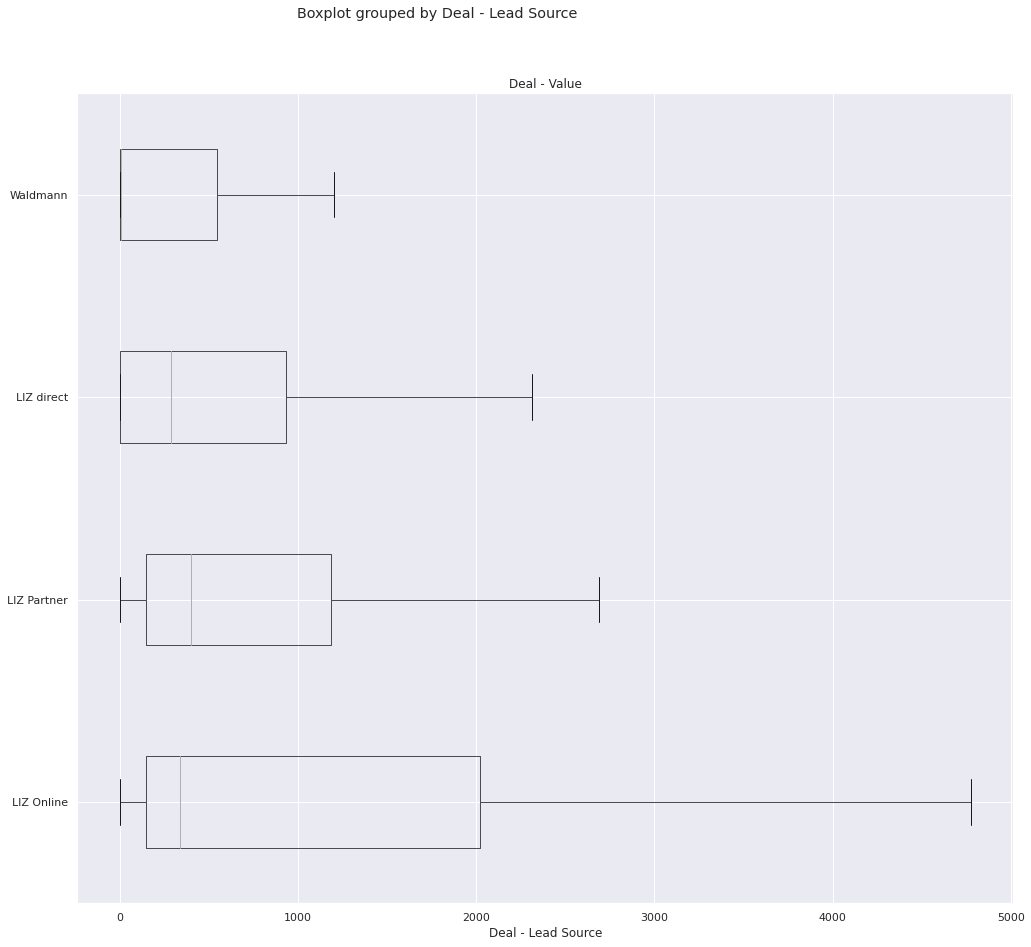

In [ ]:
df_all_leads.boxplot(column="Deal - Value", by="Deal - Lead Source", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

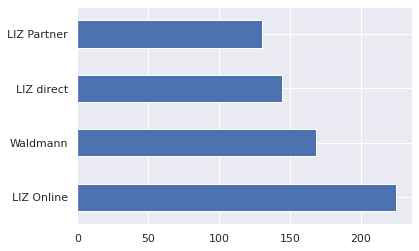

In [ ]:
df_all_leads_source = df_all_leads['Deal - Lead Source'].value_counts()

df_all_leads_source.head().plot(kind='barh')


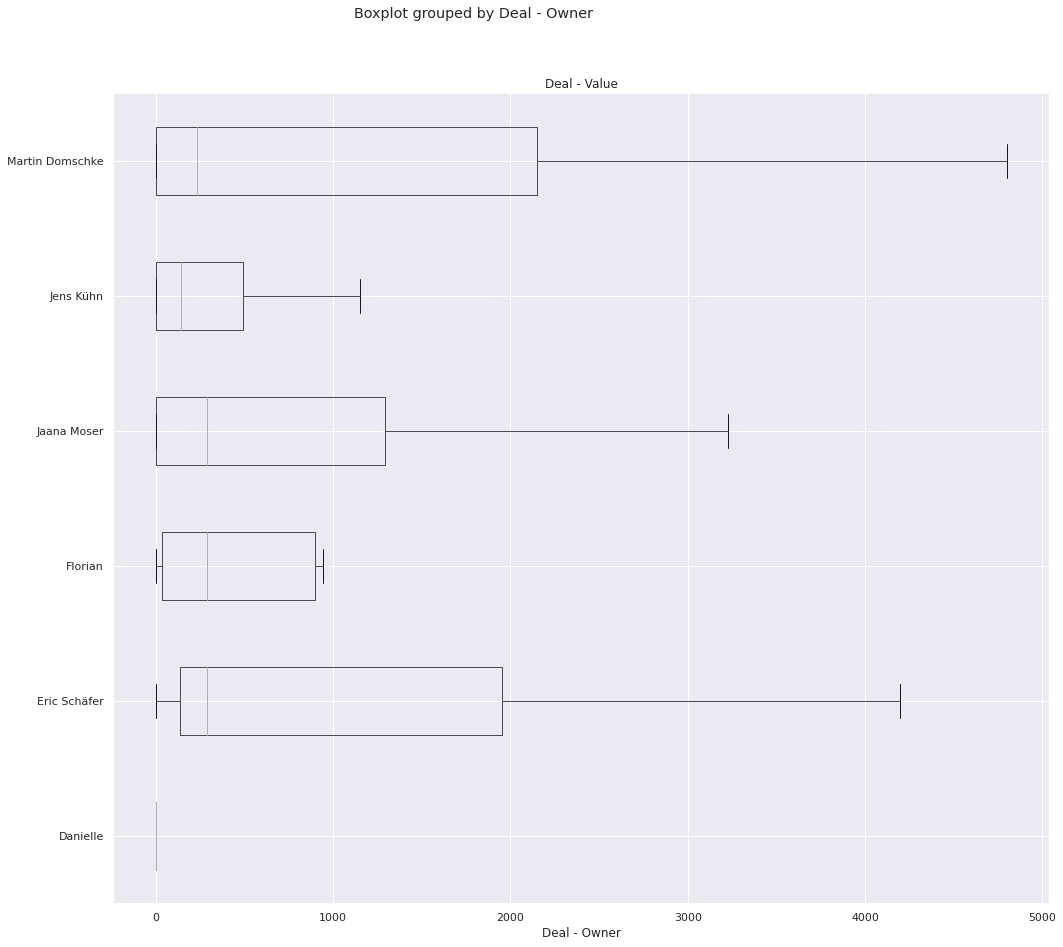

In [ ]:
df_all_leads.boxplot(column="Deal - Value", by="Deal - Owner", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

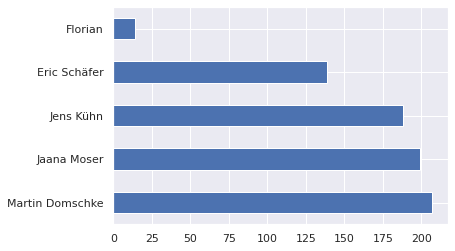

In [ ]:
df_all_leads_owners = df_all_leads['Deal - Owner'].value_counts()

df_all_leads_owners.head().plot(kind='barh')


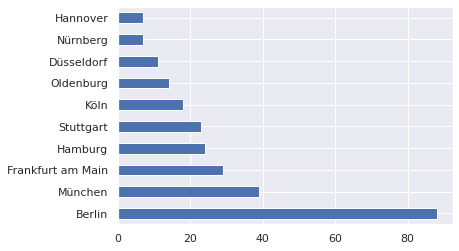

In [ ]:
df_all_leads_cities = df_all_leads['Organization - City/town/village/locality'].value_counts()

df_all_leads_cities.head(10).plot(kind='barh')


In [ ]:
df_all_leads_cities_ = df_all_leads.groupby(['Organization - City/town/village/locality'])


df_all_leads_cities_['Deal - Value'].describe()



count     mean          std    min  \
Organization - City/town/village/locality                                       
's-Hertogenbosch                             1.0     0.00          NaN    0.0   
Aachen                                       3.0  1697.00  1006.410950  568.0   
Aadorf                                       1.0     0.00          NaN    0.0   
Aalst                                        1.0   223.00          NaN  223.0   
Aarau                                        1.0   179.00          NaN  179.0   
...                                          ...      ...          ...    ...   
Wolfertschwenden                             1.0   520.20          NaN  520.2   
Worblaufen                                   1.0     0.00          NaN    0.0   
Wuppertal                                    5.0  1946.80  4112.310628    0.0   
Zossen                                       1.0     0.00          NaN    0.0   
Zürich                                       4.0  3185.25  5587.590738   90.0   

                                               25%     50%     75%      max  
Organization - City/town/village/locality                                    
's-Hertogenbosch                              0.00     0.0     0.0      0.0  
Aachen                                     1295.50  2023.0  2261.5   2500.0  
Aadorf                                        0.00     0.0     0.0      0.0  
Aalst                                       223.00   223.0   223.0    223.0  
Aarau                                       179.00   179.0   179.0    179.0  
...                                            ...     ...     ...      ...  
Wolfertschwenden                            520.20   520.2   520.2    520.2  
Worblaufen                                    0.00     0.0     0.0      0.0  
Wuppertal                                     0.00   145.0   289.0   9300.0  
Zossen                                        0.00     0.0     0.0      0.0  
Zürich                                      378.75   545.5  3352.0  11560.0  

[242 rows x 8 columns]

In [ ]:
df_all_leads_sources_ = df_all_leads.groupby(['Deal - Lead Source'])


df_all_leads_sources_['Deal - Value'].describe()



count         mean           std  min    25%     50%  \
Deal - Lead Source                                                         
LIZ Online          225.0  1834.441911   4425.823609  0.0  144.5  338.00   
LIZ Partner         130.0  2695.636692  11742.200910  0.0  144.5  397.25   
LIZ direct          144.0  1758.559722   6698.888295  0.0    0.0  289.00   
Waldmann            168.0  3241.402381  12220.777622  0.0    0.0    3.00   

                        75%       max  
Deal - Lead Source                     
LIZ Online          2023.00   44856.0  
LIZ Partner         1186.75  120000.0  
LIZ direct           933.75   75600.0  
Waldmann             544.00   96000.0

In [ ]:
df_all_Owner_ = df_all_leads.groupby(['Deal - Owner'])


df_all_Owner_['Deal - Value'].describe()



count         mean           std  min      25%    50%  \
Deal - Owner                                                             
Danielle           1.0     0.000000           NaN  0.0    0.000    0.0   
Eric Schäfer     139.0  2670.755396   8770.326558  0.0  133.950  289.0   
Florian           14.0  6274.350000  19871.234126  0.0   36.125  290.6   
Jaana Moser      199.0  2235.090302   9218.681770  0.0    0.000  289.0   
Jens Kühn        188.0   885.762926   2884.277825  0.0    0.000  144.5   
Martin Domschke  207.0  3703.382126  11353.270125  0.0    0.000  234.0   

                      75%       max  
Deal - Owner                         
Danielle            0.000       0.0  
Eric Schäfer     1954.000   75600.0  
Florian           897.925   75000.0  
Jaana Moser      1294.650  120000.0  
Jens Kühn         494.000   27456.0  
Martin Domschke  2148.000   96000.0

In [ ]:
df_all_leads = pd.read_csv("all_leads.csv")
pd.set_option('display.max_columns', None)
df_all_leads.head()


Deal - Title  Deal - Value  \
0      MERCK C10 Deal        3200.0   
1      Unicredit Deal       72000.0   
2        Daimler Deal           0.0   
3       AOK plus Deal           0.0   
4  Goldbeck Frankfurt          90.0   

                                 Deal - Organization Deal - Contact person  \
0                                         Merck KGaA          James Bourke   
1                                   UniCredit S.p.A.           Marco Mizia   
2                                            Daimler         Oliver Mantel   
3  AOK PLUS – Die Gesundheitskasse für Sachsen un...           Jan Töpfert   
4                              GOLDBECK Südwest GmbH          Julian Roros   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  \
0                 2023-06-01                       NaN  Martin Domschke   
1                 2022-03-30                       NaN  Martin Domschke   
2                        NaN                       NaN  Martin Domschke   
3                        NaN                       NaN      Jaana Moser   
4                 2020-03-01                       NaN  Martin Domschke   

  Deal - Lead Source Organization - City/town/village/locality  
0           Waldmann                                 Darmstadt  
1           Waldmann                                    Milano  
2                NaN                                 Stuttgart  
3         LIZ direct                                    Erfurt  
4           Waldmann                         Frankfurt am Main

In [ ]:
df_changed_ = df_all_leads
df_changed_["Deal - Lead Source"] = pd.Categorical(df_changed_["Deal - Lead Source"])
df_changed_['Lead Source'] = df_changed_["Deal - Lead Source"].cat.codes

df_changed_["Organization - City/town/village/locality"] = pd.Categorical(df_changed_["Organization - City/town/village/locality"])
df_changed_['City'] = df_changed_["Organization - City/town/village/locality"].cat.codes


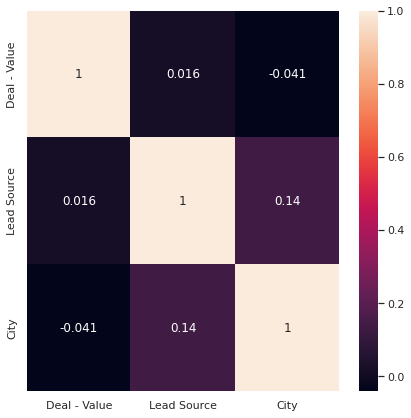

In [ ]:
corr_matrix = df_changed_.corr()
fig, ax = plt.subplots(figsize=(7,7))         
sn.heatmap(corr_matrix,annot=True) #annot=True

plt.show()

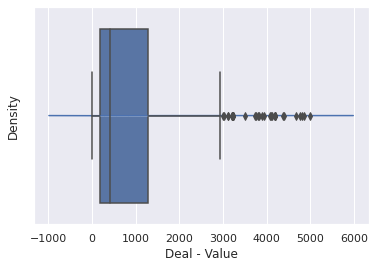

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


upper_limit = df_changed_['Deal - Value'].quantile(0.99)
lower_limit = df_changed_['Deal - Value'].quantile(0.01)

new_df = df_changed_[(df_changed_['Deal - Value'] <= 5000) & (df_changed_['Deal - Value'] >= 1)]
sns.distplot(new_df['Deal - Value'])
sns.boxplot(new_df['Deal - Value'])



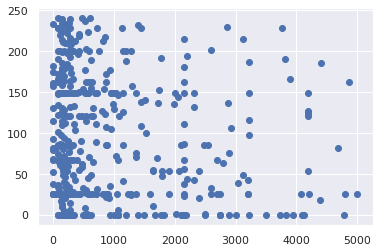

In [ ]:
y = new_df["City"]
x = new_df["Deal - Value"]

plt.scatter(x, y)
plt.show()

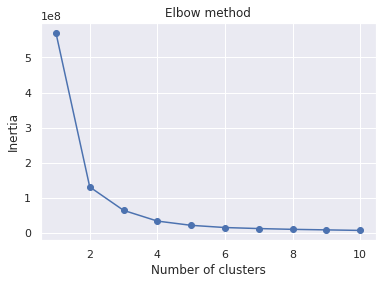

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

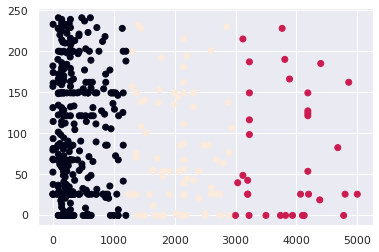

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
import matplotlib.pyplot


plt.scatter(x, y, c=kmeans.labels_)
plt.show()

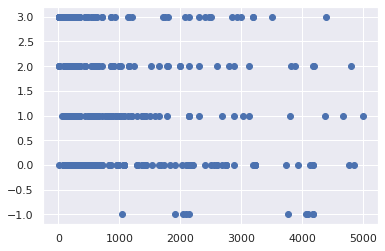

In [ ]:
y = new_df["Lead Source"]
x = new_df["Deal - Value"]

plt.scatter(x, y)
plt.show()

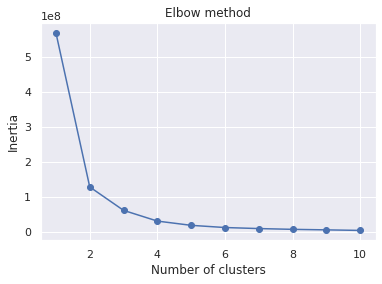

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

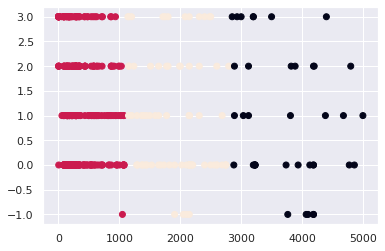

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
import matplotlib.pyplot


plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
df_all_won_leads = pd.read_csv("all_won_leads.csv")
pd.set_option('display.max_columns', None)
df_all_won_leads.head()


Deal - Title  Deal - Value    Deal - Organization  \
0          Goldbeck Frankfurt          90.0  GOLDBECK Südwest GmbH   
1                     Novatec         153.0                Novatec   
2            Solarisbank Deal         716.0         Solarisbank AG   
3  Energie Steiermark AG Deal         171.0  Energie Steiermark AG   
4             Productsup Deal         636.0             Productsup   

  Deal - Contact person Deal - Expected close date Deal - Next activity date  \
0          Julian Roros                 2020-03-01                       NaN   
1         Markus Scheel                 2021-01-30                       NaN   
2  Sandra Schaarschmidt                 2021-04-01                       NaN   
3         Erich Schober                 2021-11-01                       NaN   
4     Marcel Hollerbach                 2021-01-18                       NaN   

      Deal - Owner Deal - Lead Source  \
0  Martin Domschke           Waldmann   
1  Martin Domschke           Waldmann   
2  Martin Domschke         LIZ direct   
3      Jaana Moser           Waldmann   
4  Martin Domschke         LIZ direct   

  Organization - City/town/village/locality  
0                         Frankfurt am Main  
1                   Leinfelden-Echterdingen  
2                                    Berlin  
3                                      Graz  
4                                    Berlin

In [ ]:
df_all_won_leads.describe()


Deal - Value
count    113.000000
mean     350.564602
std      428.125171
min       49.000000
25%      130.000000
50%      179.000000
75%      349.000000
max     2400.000000

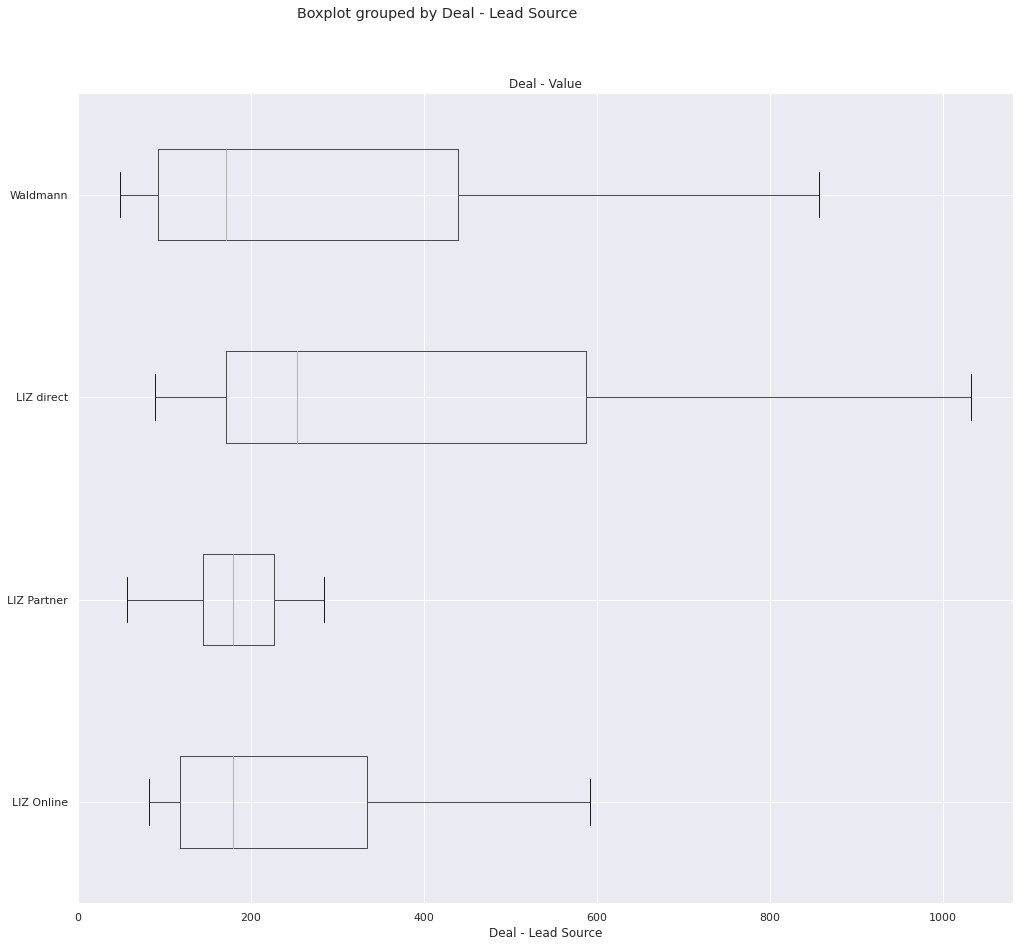

In [ ]:
df_all_won_leads.boxplot(column="Deal - Value", by="Deal - Lead Source", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

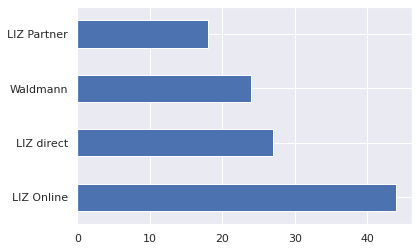

In [ ]:
df_all_won_leads_source = df_all_won_leads['Deal - Lead Source'].value_counts()

df_all_won_leads_source.head().plot(kind='barh')


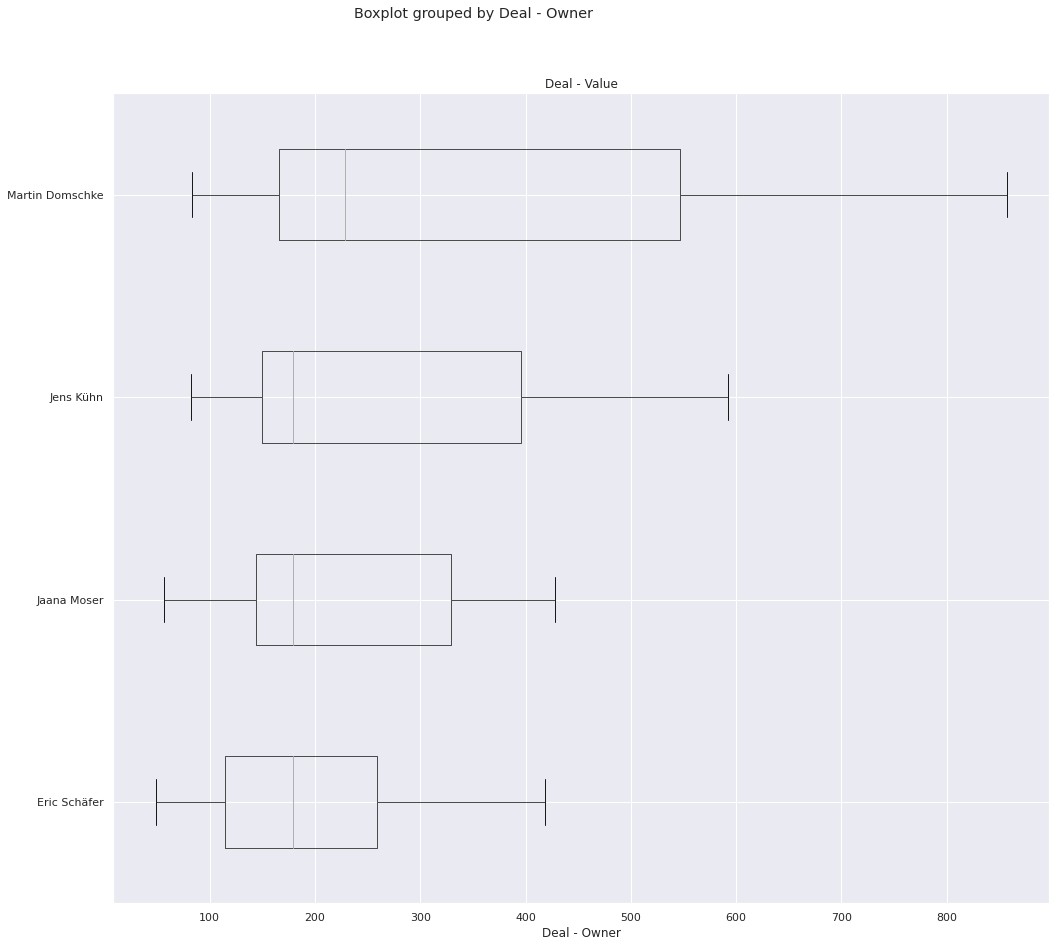

In [ ]:
df_all_won_leads.boxplot(column="Deal - Value", by="Deal - Owner", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

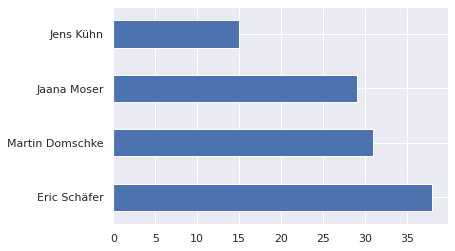

In [ ]:
df_all_won_leads_owners = df_all_won_leads['Deal - Owner'].value_counts()

df_all_won_leads_owners.head().plot(kind='barh')


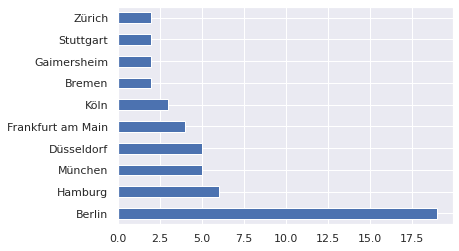

In [ ]:
df_all_won_leads_cities = df_all_won_leads['Organization - City/town/village/locality'].value_counts()

df_all_won_leads_cities.head(10).plot(kind='barh')


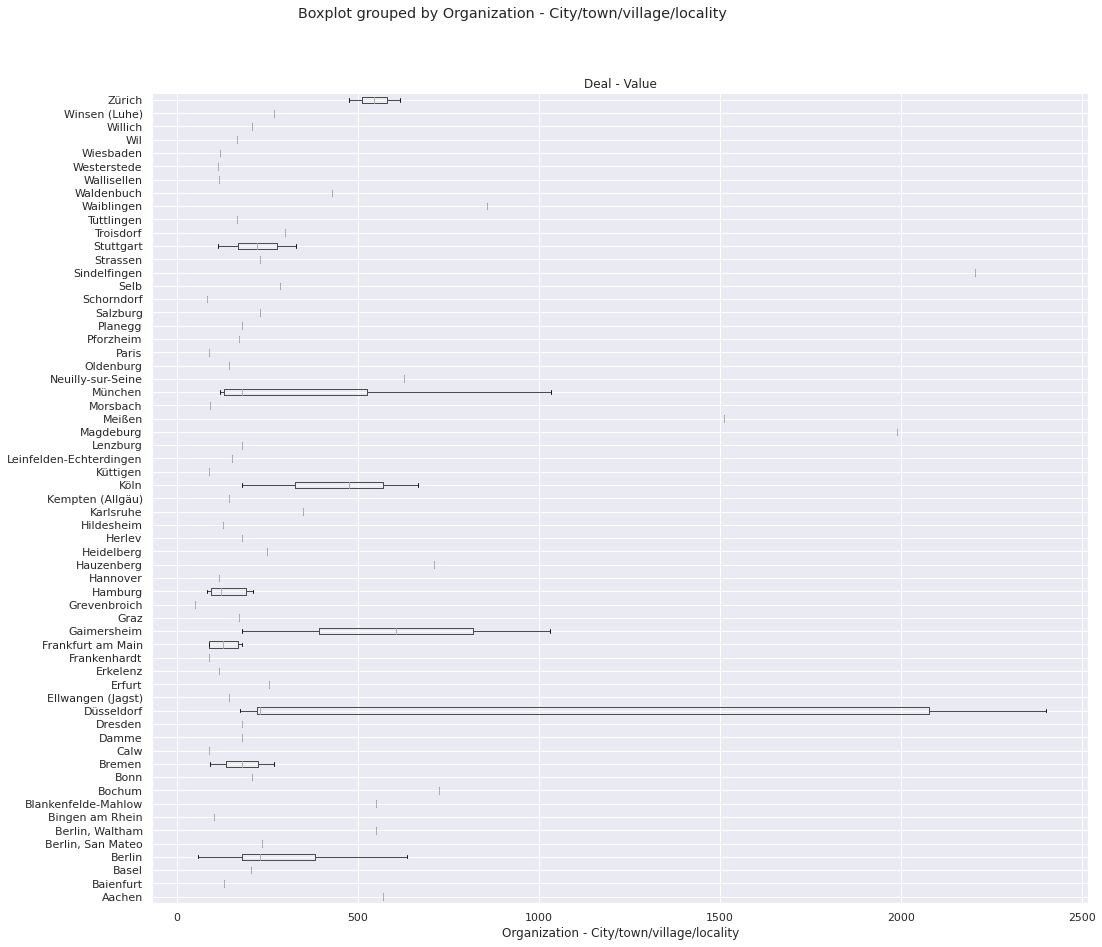

In [ ]:
df_all_won_leads.boxplot(column="Deal - Value", by="Organization - City/town/village/locality", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

In [ ]:
df_all_won_leads_cities_ = df_all_won_leads.groupby(['Organization - City/town/village/locality'])


df_all_won_leads_cities_['Deal - Value'].describe()



count        mean         std  \
Organization - City/town/village/locality                                  
Aachen                                       1.0  568.000000         NaN   
Baienfurt                                    1.0  130.500000         NaN   
Basel                                        1.0  204.000000         NaN   
Berlin                                      19.0  306.184211  214.313193   
Berlin, San Mateo                            1.0  234.000000         NaN   
...                                          ...         ...         ...   
Wiesbaden                                    1.0  120.000000         NaN   
Wil                                          1.0  165.000000         NaN   
Willich                                      1.0  206.200000         NaN   
Winsen (Luhe)                                1.0  269.000000         NaN   
Zürich                                       2.0  545.500000   99.702056   

                                             min     25%    50%     75%    max  
Organization - City/town/village/locality                                       
Aachen                                     568.0  568.00  568.0  568.00  568.0  
Baienfurt                                  130.5  130.50  130.5  130.50  130.5  
Basel                                      204.0  204.00  204.0  204.00  204.0  
Berlin                                      57.0  179.00  229.0  381.75  825.0  
Berlin, San Mateo                          234.0  234.00  234.0  234.00  234.0  
...                                          ...     ...    ...     ...    ...  
Wiesbaden                                  120.0  120.00  120.0  120.00  120.0  
Wil                                        165.0  165.00  165.0  165.00  165.0  
Willich                                    206.2  206.20  206.2  206.20  206.2  
Winsen (Luhe)                              269.0  269.00  269.0  269.00  269.0  
Zürich                                     475.0  510.25  545.5  580.75  616.0  

[61 rows x 8 columns]

In [ ]:
df_all_won_leads_sources_ = df_all_won_leads.groupby(['Deal - Lead Source'])


df_all_won_leads_sources_['Deal - Value'].describe()



count        mean         std   min      25%    50%  \
Deal - Lead Source                                                        
LIZ Online           44.0  343.431818  468.642024  82.0  118.000  179.0   
LIZ Partner          18.0  244.916667  229.090417  57.0  144.625  179.0   
LIZ direct           27.0  444.207407  456.468052  89.0  172.000  253.0   
Waldmann             24.0  337.529167  433.945156  49.0   93.000  171.0   

                       75%     max  
Deal - Lead Source                  
LIZ Online          334.00  2400.0  
LIZ Partner         226.75  1030.0  
LIZ direct          587.00  1990.0  
Waldmann            439.75  2079.0

In [ ]:
df_all_won_Owner_ = df_all_won_leads.groupby(['Deal - Owner'])


df_all_won_Owner_['Deal - Value'].describe()



count        mean         std   min     25%    50%    75%  \
Deal - Owner                                                                 
Eric Schäfer      38.0  318.055263  493.402603  49.0  115.00  179.0  259.0   
Jaana Moser       29.0  316.344828  287.393462  57.0  144.50  179.0  329.0   
Jens Kühn         15.0  430.846667  562.809022  82.0  149.75  179.0  395.5   
Martin Domschke   31.0  383.580645  390.269055  83.0  166.00  229.0  547.0   

                    max  
Deal - Owner             
Eric Schäfer     2400.0  
Jaana Moser      1032.0  
Jens Kühn        1990.0  
Martin Domschke  2079.0

In [ ]:
df_changed__ = df_all_won_leads
df_changed__["Deal - Lead Source"] = pd.Categorical(df_changed__["Deal - Lead Source"])
df_changed__['Lead Source'] = df_changed__["Deal - Lead Source"].cat.codes

df_changed__["Organization - City/town/village/locality"] = pd.Categorical(df_changed__["Organization - City/town/village/locality"])
df_changed__['City'] = df_changed__["Organization - City/town/village/locality"].cat.codes


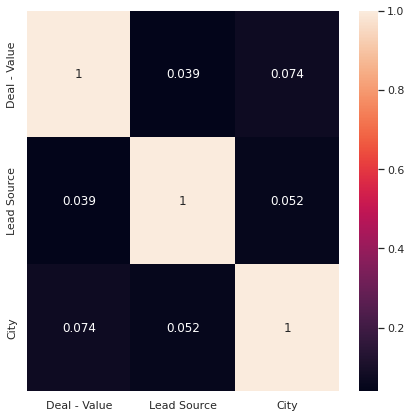

In [ ]:
corr_matrix = df_changed__.corr()
fig, ax = plt.subplots(figsize=(7,7))         
sn.heatmap(corr_matrix,annot=True) #annot=True

plt.show()

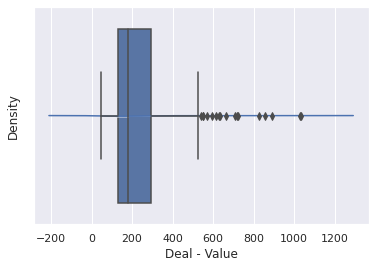

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


upper_limit = df_changed__['Deal - Value'].quantile(0.99)
lower_limit = df_changed__['Deal - Value'].quantile(0.01)

new_df_ = df_changed__[(df_changed__['Deal - Value'] <= 1500) & (df_changed__['Deal - Value'] >= 1)]
sns.distplot(new_df_['Deal - Value'])
sns.boxplot(new_df_['Deal - Value'])



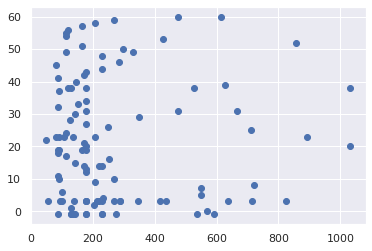

In [ ]:
y = new_df_["City"]
x = new_df_["Deal - Value"]

plt.scatter(x, y)
plt.show()

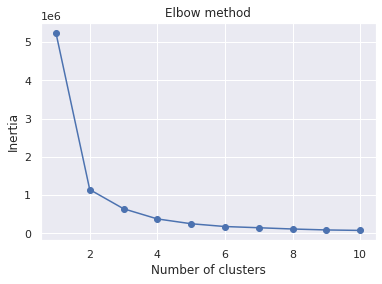

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

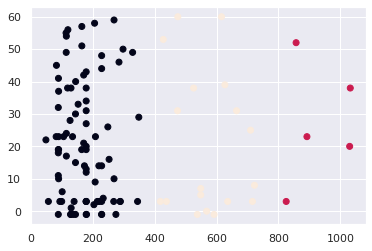

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
import matplotlib.pyplot


plt.scatter(x, y, c=kmeans.labels_)
plt.show()

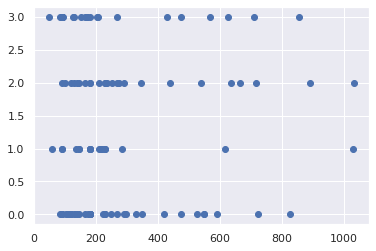

In [ ]:
y = new_df_["Lead Source"]
x = new_df_["Deal - Value"]

plt.scatter(x, y)
plt.show()

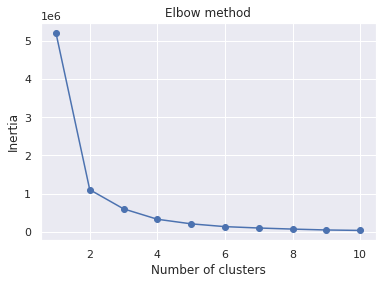

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

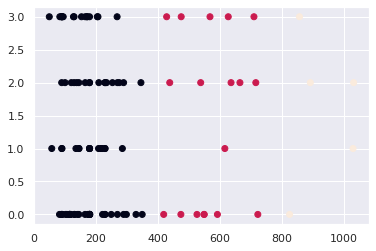

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
import matplotlib.pyplot


plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
df_all_lost_leads = pd.read_csv("all_lost_leads.csv")
pd.set_option('display.max_columns', None)
df_all_lost_leads.head()


Deal - Title  Deal - Value  \
0   MERCK C10 Deal        3200.0   
1   Unicredit Deal       72000.0   
2     Daimler Deal           0.0   
3    AOK plus Deal           0.0   
4  Bosch Gerlingen        4100.0   

                                 Deal - Organization Deal - Contact person  \
0                                         Merck KGaA          James Bourke   
1                                   UniCredit S.p.A.           Marco Mizia   
2                                            Daimler         Oliver Mantel   
3  AOK PLUS – Die Gesundheitskasse für Sachsen un...           Jan Töpfert   
4                                  Robert Bosch GmbH                   NaN   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  \
0                 2023-06-01                       NaN  Martin Domschke   
1                 2022-03-30                       NaN  Martin Domschke   
2                        NaN                       NaN  Martin Domschke   
3                        NaN                       NaN      Jaana Moser   
4                        NaN                       NaN  Martin Domschke   

  Deal - Lead Source Organization - City/town/village/locality  
0           Waldmann                                 Darmstadt  
1           Waldmann                                    Milano  
2                NaN                                 Stuttgart  
3         LIZ direct                                    Erfurt  
4                NaN                                       NaN

In [ ]:
print(df_lost_deals.describe())


        Deal - Value
count     371.000000
mean     4297.692588
std     12558.567780
min         0.000000
25%         0.000000
50%       350.000000
75%      2748.000000
max    120000.000000


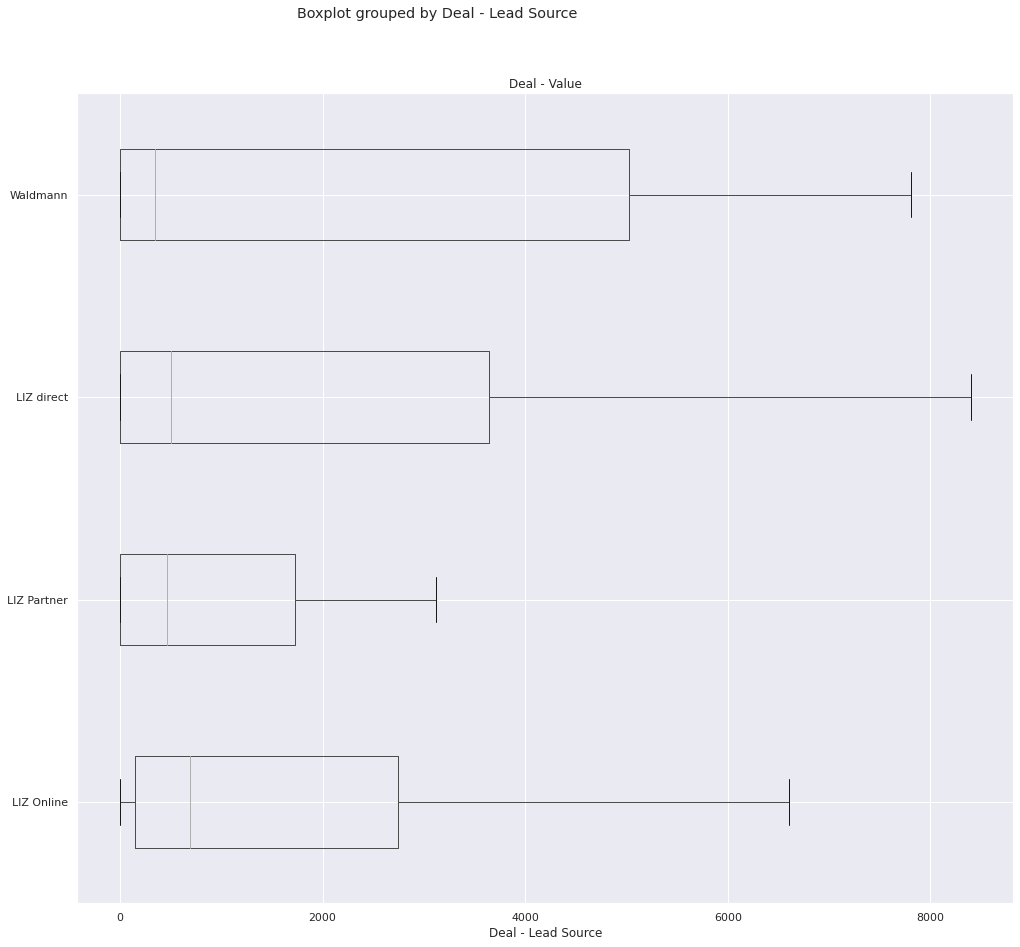

In [ ]:
df_all_lost_leads.boxplot(column="Deal - Value", by="Deal - Lead Source", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

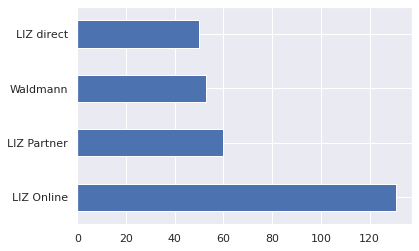

In [ ]:
df_all_lost_leads_source = df_all_lost_leads['Deal - Lead Source'].value_counts()

df_all_lost_leads_source.head().plot(kind='barh')


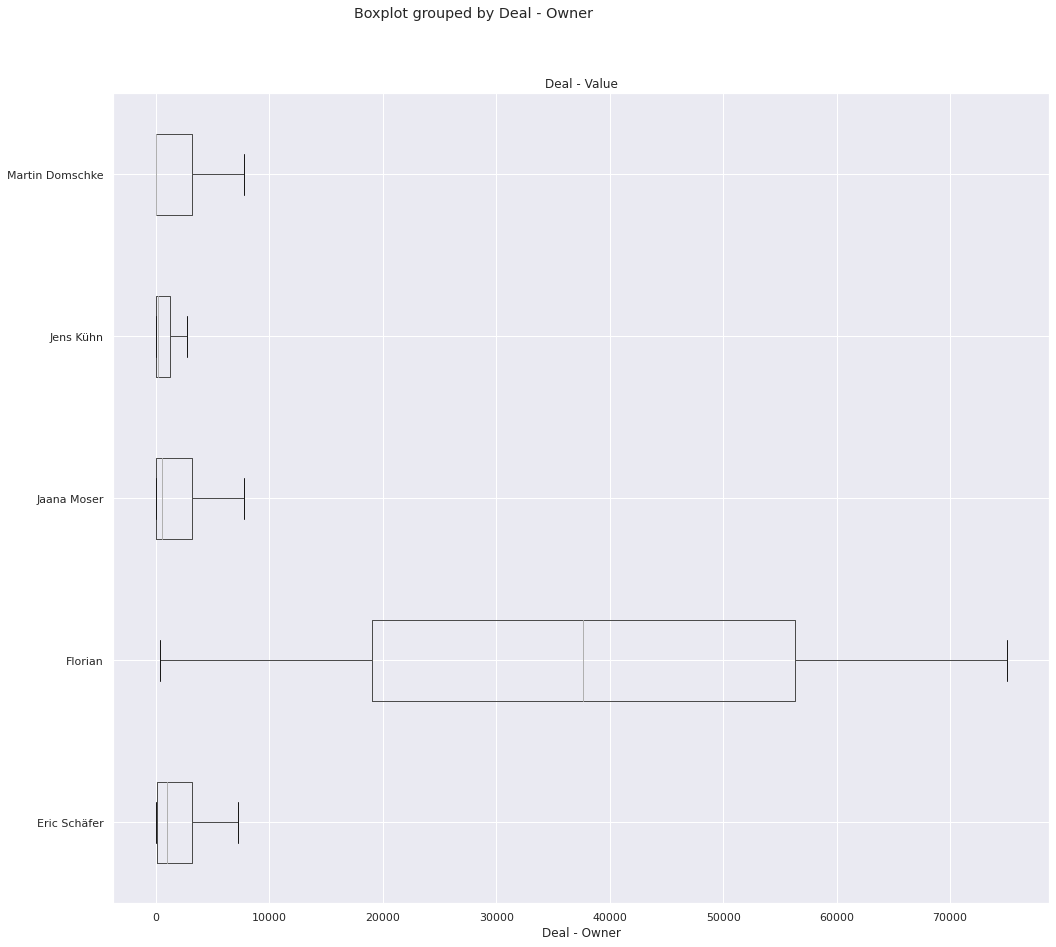

In [ ]:
df_all_lost_leads.boxplot(column="Deal - Value", by="Deal - Owner", showfliers=False, vert=False, figsize=(20, 15))
plt.subplots_adjust(left=0.25)
plt.show()

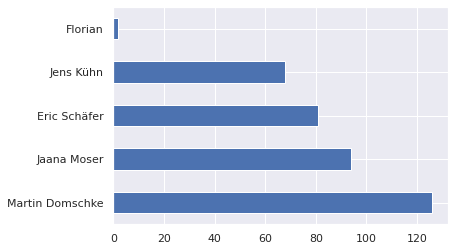

In [ ]:
df_all_lost_leads_owners = df_all_lost_leads['Deal - Owner'].value_counts()

df_all_lost_leads_owners.head().plot(kind='barh')


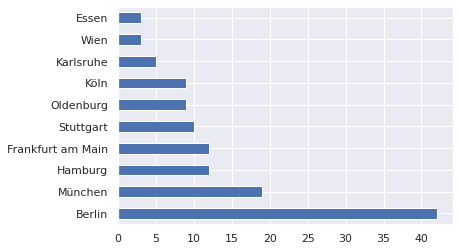

In [ ]:
df_all_lost_leads_cities = df_all_lost_leads['Organization - City/town/village/locality'].value_counts()

df_all_lost_leads_cities.head(10).plot(kind='barh')


In [ ]:
df_all_lost_leads_cities_ = df_all_lost_leads.groupby(['Organization - City/town/village/locality'])


df_all_lost_leads_cities_['Deal - Value'].describe()



count     mean          std  \
Organization - City/town/village/locality                                
Aachen                                       1.0  2500.00          NaN   
Aarau                                        1.0   179.00          NaN   
Ahaus                                        1.0     0.00          NaN   
Amberg                                       1.0   536.00          NaN   
Amsterdam                                    2.0    72.25   102.176930   
...                                          ...      ...          ...   
Wittstock/Dosse                              1.0     0.00          NaN   
Worblaufen                                   1.0     0.00          NaN   
Wuppertal                                    2.0  4650.00  6576.093065   
Zossen                                       1.0     0.00          NaN   
Zürich                                       1.0    90.00          NaN   

                                              min       25%      50%  \
Organization - City/town/village/locality                              
Aachen                                     2500.0  2500.000  2500.00   
Aarau                                       179.0   179.000   179.00   
Ahaus                                         0.0     0.000     0.00   
Amberg                                      536.0   536.000   536.00   
Amsterdam                                     0.0    36.125    72.25   
...                                           ...       ...      ...   
Wittstock/Dosse                               0.0     0.000     0.00   
Worblaufen                                    0.0     0.000     0.00   
Wuppertal                                     0.0  2325.000  4650.00   
Zossen                                        0.0     0.000     0.00   
Zürich                                       90.0    90.000    90.00   

                                                75%     max  
Organization - City/town/village/locality                    
Aachen                                     2500.000  2500.0  
Aarau                                       179.000   179.0  
Ahaus                                         0.000     0.0  
Amberg                                      536.000   536.0  
Amsterdam                                   108.375   144.5  
...                                             ...     ...  
Wittstock/Dosse                               0.000     0.0  
Worblaufen                                    0.000     0.0  
Wuppertal                                  6975.000  9300.0  
Zossen                                        0.000     0.0  
Zürich                                       90.000    90.0  

[126 rows x 8 columns]

In [ ]:
df_all_lost_leads_sources_ = df_all_lost_leads.groupby(['Deal - Lead Source'])


df_all_lost_leads_sources_['Deal - Value'].describe()



count         mean           std  min    25%     50%  \
Deal - Lead Source                                                         
LIZ Online          131.0  2679.356870   5577.986325  0.0  144.5  695.00   
LIZ Partner          60.0  4683.231667  17033.904927  0.0    0.0  465.25   
LIZ direct           50.0  3616.452000  10853.200190  0.0    0.0  508.00   
Waldmann             53.0  9539.994340  20463.991728  0.0    0.0  350.00   

                       75%       max  
Deal - Lead Source                    
LIZ Online          2748.0   44856.0  
LIZ Partner         1729.5  120000.0  
LIZ direct          3646.8   75600.0  
Waldmann            5028.0   96000.0

In [ ]:
df_all_lost_Owner_ = df_all_lost_leads.groupby(['Deal - Owner'])


df_all_lost_Owner_['Deal - Value'].describe()



count          mean           std    min      25%      50%  \
Deal - Owner                                                                  
Eric Schäfer      81.0   4214.245679  11240.011565    0.0     90.0   1000.0   
Florian            2.0  37675.000000  52785.521216  350.0  19012.5  37675.0   
Jaana Moser       94.0   4014.847340  13156.712365    0.0      0.0    508.5   
Jens Kühn         68.0   1893.211765   4585.067559    0.0      0.0    229.0   
Martin Domschke  126.0   5330.206349  14196.278948    0.0      0.0      0.0   

                     75%       max  
Deal - Owner                        
Eric Schäfer      3200.0   75600.0  
Florian          56337.5   75000.0  
Jaana Moser       3201.3  120000.0  
Jens Kühn         1278.5   27456.0  
Martin Domschke   3180.3   96000.0

In [ ]:
df_changed___ = df_all_lost_leads
df_changed___["Deal - Lead Source"] = pd.Categorical(df_changed___["Deal - Lead Source"])
df_changed___['Lead Source'] = df_changed___["Deal - Lead Source"].cat.codes

df_changed___["Organization - City/town/village/locality"] = pd.Categorical(df_changed___["Organization - City/town/village/locality"])
df_changed___['City'] = df_changed___["Organization - City/town/village/locality"].cat.codes


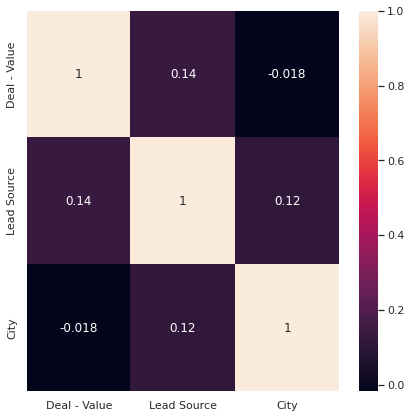

In [ ]:
corr_matrix = df_changed___.corr()
fig, ax = plt.subplots(figsize=(7,7))         
sn.heatmap(corr_matrix,annot=True) #annot=True

plt.show()

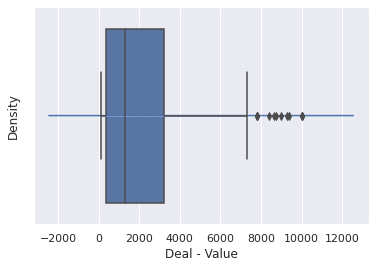

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


upper_limit = df_changed___['Deal - Value'].quantile(0.99)
lower_limit = df_changed___['Deal - Value'].quantile(0.01)

new_df_ = df_changed___[(df_changed___['Deal - Value'] <= 10000) & (df_changed___['Deal - Value'] >= 1)]
sns.distplot(new_df_['Deal - Value'])
sns.boxplot(new_df_['Deal - Value'])



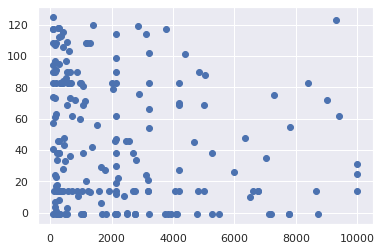

In [ ]:
y = new_df_["City"]
x = new_df_["Deal - Value"]

plt.scatter(x, y)
plt.show()

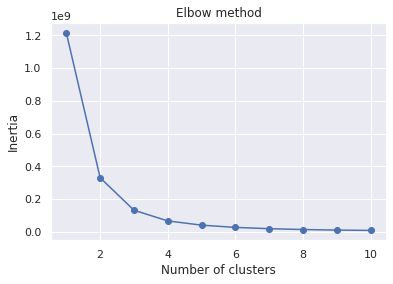

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

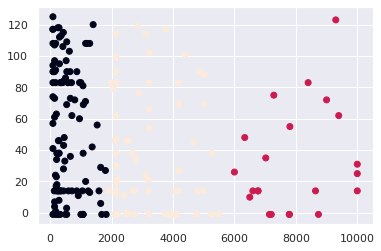

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
import matplotlib.pyplot


plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
!pip install autoviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# df_changed___.to_csv("df_changed___")

NameError: ignored

Shape of your Data Set loaded: (113, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


  Printing upto 30 columns max in each category:
    Numeric Columns : ['Deal - Value']
    Integer-Categorical Columns: []
    String-Categorical Columns: ['Deal - Contact person', 'Deal - Next activity date', 'Deal - Owner', 'Deal - Lead Source', 'Deal - Expected close date', 'Organization - City/town/village/locality']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: ['Deal - Title', 'Deal - Organization']
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
   Columns to delete:
'   []'
   Boolean variables %s 
'   []'
   Categorical variables %s 
("   ['Deal - Contact person', 'Deal - Next activity date', 'Deal - Owner', "
 "'Deal - Lead Source', 'Deal - Expected close date', 'Organization - "
 "City/town/village/lo

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

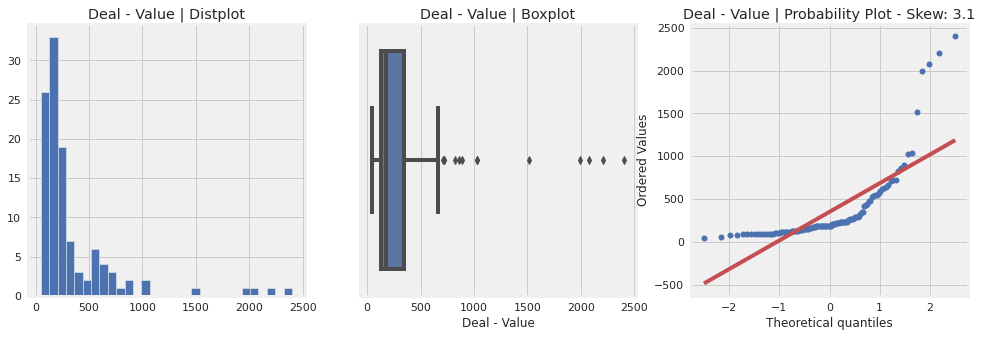

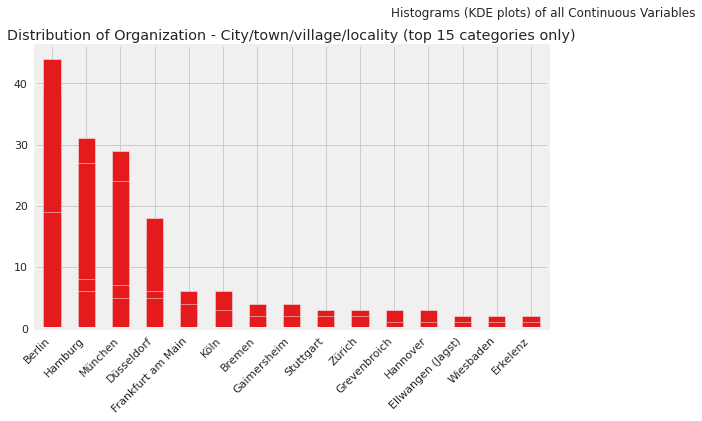

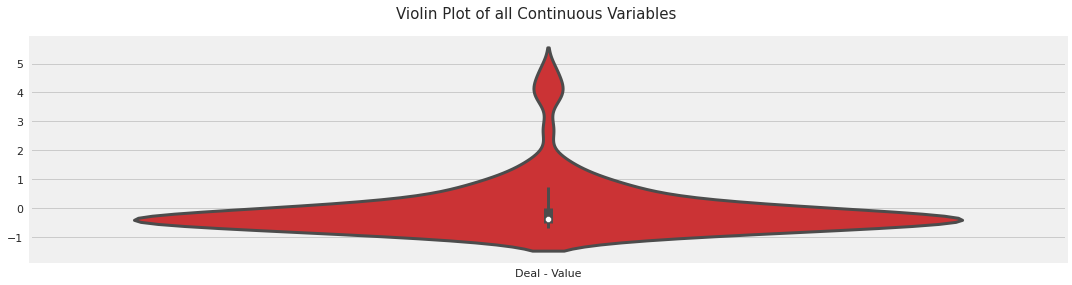

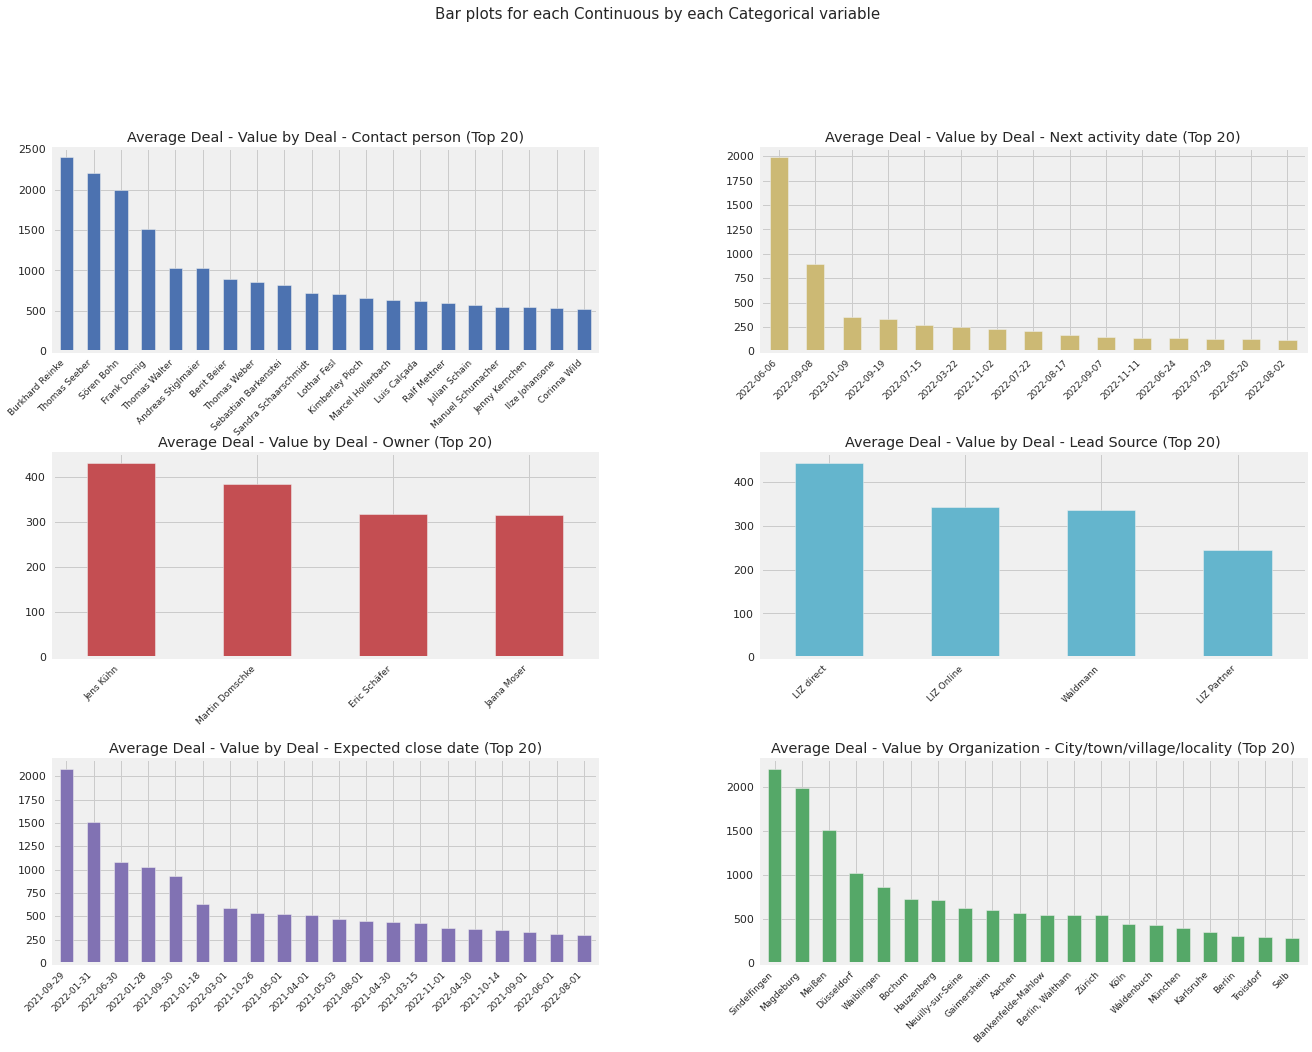

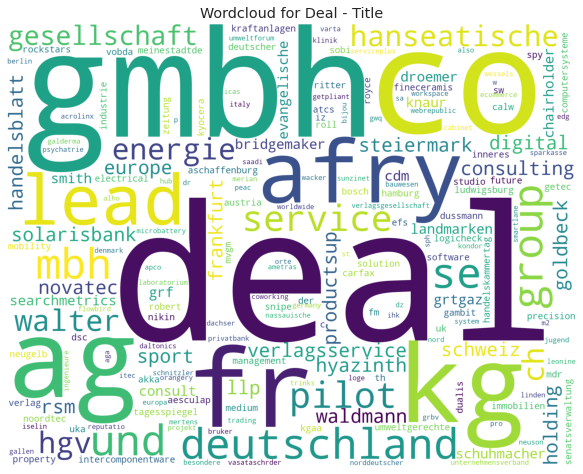

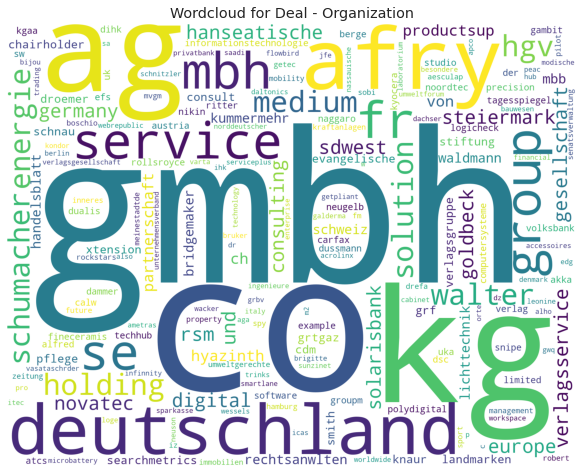

All Plots are saved in ./AutoViz_Plots/AutoViz
Time to run AutoViz = 16 seconds 


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class  

AV = AutoViz_Class() 

%matplotlib inline                              
filename = "all_won_leads.csv" 
sep = ","
dft = AV.AutoViz(
    filename,
    sep=sep,
    depVar="",
    dfte=None,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=2000,
    max_cols_analyzed=20,
)

In [ ]:
df_won_lost = pd.read_csv("won_lost_.csv")
df_won_lost.head(10)




Deal - Title  Deal - Value  \
0          MERCK C10 Deal        3200.0   
1          Unicredit Deal       72000.0   
2            Daimler Deal           0.0   
3           AOK plus Deal           0.0   
4      Goldbeck Frankfurt          90.0   
5         Bosch Gerlingen        4100.0   
6  Bosch Schwäbisch Gmünd           0.0   
7                Inolares           0.0   
8                ELE Deal           0.0   
9         Beiersdorf Deal       20000.0   

                                 Deal - Organization Deal - Contact person  \
0                                         Merck KGaA          James Bourke   
1                                   UniCredit S.p.A.           Marco Mizia   
2                                            Daimler         Oliver Mantel   
3  AOK PLUS – Die Gesundheitskasse für Sachsen un...           Jan Töpfert   
4                              GOLDBECK Südwest GmbH          Julian Roros   
5                                  Robert Bosch GmbH                   NaN   
6                                  Robert Bosch GmbH                   NaN   
7                             Inolares GmbH & Co. KG            Ahmad Shad   
8                         Emscher Lippe Energie GmbH       Markus Thiemann   
9                                      Beiersdorf AG         Alfred Grosch   

  Deal - Expected close date Deal - Next activity date     Deal - Owner  \
0                 2023-06-01                       NaN  Martin Domschke   
1                 2022-03-30                       NaN  Martin Domschke   
2                        NaN                       NaN  Martin Domschke   
3                        NaN                       NaN      Jaana Moser   
4                 2020-03-01                       NaN  Martin Domschke   
5                        NaN                       NaN  Martin Domschke   
6                        NaN                       NaN  Martin Domschke   
7                        NaN                       NaN  Martin Domschke   
8                        NaN                       NaN      Jaana Moser   
9                 2021-10-10                       NaN  Martin Domschke   

  Deal - Lead Source Organization - City/town/village/locality Deal - Status  
0           Waldmann                                 Darmstadt          Lost  
1           Waldmann                                    Milano          Lost  
2                NaN                                 Stuttgart          Lost  
3         LIZ direct                                    Erfurt          Lost  
4           Waldmann                         Frankfurt am Main           Won  
5                NaN                                       NaN          Lost  
6                NaN                                       NaN          Lost  
7                NaN                                    Berlin          Lost  
8                NaN                             Gelsenkirchen          Lost  
9                NaN                                   Hamburg          Lost

In [ ]:
df_won_lost["Deal - Lead Source"] = pd.Categorical(df_won_lost["Deal - Lead Source"])
df_won_lost['Lead Source'] = df_won_lost["Deal - Lead Source"].cat.codes

df_won_lost["Organization - City/town/village/locality"] = pd.Categorical(df_won_lost["Organization - City/town/village/locality"])
df_won_lost['City'] = df_won_lost["Organization - City/town/village/locality"].cat.codes

df_won_lost["Deal - Status"] = pd.Categorical(df_won_lost["Deal - Status"])
df_won_lost['deal_status'] = df_won_lost["Deal - Status"].cat.codes

df_won_lost["Deal - Status"] = pd.Categorical(df_won_lost["Deal - Status"])
df_won_lost['deal_status'] = df_won_lost["Deal - Status"].cat.codes

df_won_lost["Deal - Owner"] = pd.Categorical(df_won_lost["Deal - Owner"])
df_won_lost['owner'] = df_won_lost["Deal - Owner"].cat.codes


In [ ]:
df_won_lost.head(40)


Deal - Title  Deal - Value  \
0                          MERCK C10 Deal        3200.0   
1                          Unicredit Deal       72000.0   
2                            Daimler Deal           0.0   
3                           AOK plus Deal           0.0   
4                      Goldbeck Frankfurt          90.0   
5                         Bosch Gerlingen        4100.0   
6                  Bosch Schwäbisch Gmünd           0.0   
7                                Inolares           0.0   
8                                ELE Deal           0.0   
9                         Beiersdorf Deal       20000.0   
10                                    EOS        2100.0   
11                                    PWC           0.0   
12                                 TRUMPF           0.0   
13                              GKVI Deal           0.0   
14                          Diconium Deal           0.0   
15  Rheinischer Sparkassenund Giroverband           0.0   
16                               AVG Deal       16600.0   
17               Gebr. Wichmann GmbH Deal           0.0   
18            Bosch Campus Feuerbach Deal        7200.0   
19                                 co.mod           0.0   
20                                Novatec         153.0   
21                          Swisscom Deal           0.0   
22                       Solarisbank Deal         716.0   
23            SparkassenVersicherung Deal           0.0   
24                       Oberbank AG Deal           0.0   
25                              Disy Deal        9396.0   
26                             Wooga Deal        1908.0   
27                NEUMANN ARCHITEKTEN BDA           0.0   
28                         value one Deal        3766.0   
29             Energie Steiermark AG Deal         171.0   
30                         IFG Group Deal           0.0   
31                      Della Chiara Deal        4400.0   
32                       Taxfix GmbH Deal        4200.0   
33                           Stadler Deal           0.0   
34       Bürogebäude Berlin-Adlershof B.5        5500.0   
35                        ESCRIBA AG Deal        1050.0   
36                    GOLDBECK SOLAR Deal        7806.0   
37                               HSE Deal           0.0   
38                          Enercity Deal       25800.0   
39                         Lufthansa Deal           0.0   

                                  Deal - Organization   Deal - Contact person  \
0                                          Merck KGaA            James Bourke   
1                                    UniCredit S.p.A.             Marco Mizia   
2                                             Daimler           Oliver Mantel   
3   AOK PLUS – Die Gesundheitskasse für Sachsen un...             Jan Töpfert   
4                               GOLDBECK Südwest GmbH            Julian Roros   
5                                   Robert Bosch GmbH                     NaN   
6                                   Robert Bosch GmbH                     NaN   
7                              Inolares GmbH & Co. KG              Ahmad Shad   
8                          Emscher Lippe Energie GmbH         Markus Thiemann   
9                                       Beiersdorf AG           Alfred Grosch   
10                                                EOS            Dirk Knudsen   
11  PricewaterhouseCoopers GmbH Wirtschaftsprüfung...    Christian de Clerque   
12                                                NaN           Eberhard Wahl   
13                                 gkv informatik GbR              Dirk Leven   
14                                           Diconium           Ralph Doerper   
15              Rheinischer Sparkassenund Giroverband                     NaN   
16                   Albtal-Verkehrs-Gesellschaft mbH           Jens Knobloch   
17                                Gebr. Wichmann GmbH            Manfred Hess   
18                                  Robert Bosch GmbH          Joachim

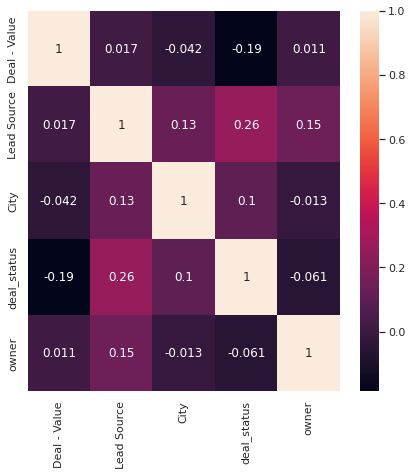

In [ ]:
corr_matrix = df_won_lost.corr()
fig, ax = plt.subplots(figsize=(7,7))         
sn.heatmap(corr_matrix,annot=True) #annot=True

plt.show()

In [ ]:
x = df_won_lost["Lead Source"]
y = df_won_lost.deal_status 
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(x, y)



(0.26190605232743935, 3.1406840814234916e-13)

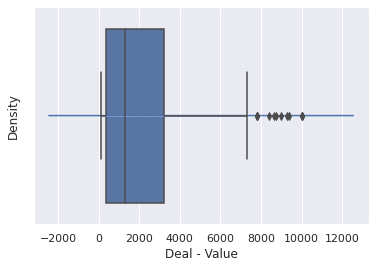

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_won_lost = pd.read_csv("lost.csv")
df_won_lost.head(10)

upper_limit = df_won_lost['Deal - Value'].quantile(0.99)
lower_limit = df_won_lost['Deal - Value'].quantile(0.01)

new_df_ = df_won_lost[(df_won_lost['Deal - Value'] <= 10000) & (df_won_lost['Deal - Value'] > 0)]
sns.distplot(new_df_['Deal - Value'])
sns.boxplot(new_df_['Deal - Value'])



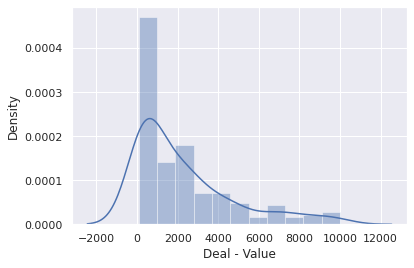

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# grouby_leads = df.groupby(['Lead Source'])

# grouby_leads_waldman = grouby_leads.get_group('Waldmann')


age1=new_df_['Deal - Value']
sns.distplot(age1)         
plt.show()